# Demo  PCA and Kernel PCA for image denoising and reconstruction 
 
Author: <alberto.suarez@uam.es>  


In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets
from sklearn.model_selection import train_test_split

def plot_pca(pca, X_pca, n_fig=1):
    """Plot eigenvalues of the covariance matrix and explained variance"""
    n_samples, n_features = np.shape(X_pca)
    
    singular_values = pca.singular_values_ 
    accumulated_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    fig, axs = plt.subplots(2, 1, sharex = True, figsize = (10, 8), num=n_fig)

    indices_plot = range(n_features)
    fontsize = 14

    axs[0].plot(indices_plot, singular_values)
    x_min, x_max = axs[0].get_xlim()
    axs[0].hlines(0.0, x_min, x_max, color='r', linestyle='dashed')
    axs[0].set_ylabel('Singular values', fontsize=fontsize)

    axs[1].plot(indices_plot, accumulated_explained_variance_ratio)
    axs[1].hlines(1.0, x_min, x_max, color='r', linestyle='dashed')
    axs[1].set_xlabel('Index', fontsize=fontsize)
    axs[1].set_ylabel('Explained variance ratio', fontsize=fontsize)

    _ = fig.suptitle('PCA', fontsize=fontsize + 2)


def plot_images(X, image_shape, n_rows_plot=2, n_columns_plot=2, n_fig=1, figsize=(8, 8)):
    """Plot images that are stored as rows of a data matrix"""
    n_plot = n_rows_plot * n_columns_plot  
    
    fig, axs = plt.subplots(n_rows_plot, n_columns_plot, 
                            sharex= True, sharey=True,
                            figsize=figsize, num=n_fig)
    if n_rows_plot == 1:
        axs = axs[np.newaxis, :]
    elif n_columns_plot == 1:
        axs = axs[:, np.newaxis]
        
    # Display the images
    for n in range(n_plot):
        n_row_plot = n // n_columns_plot
        n_column_plot = n % n_columns_plot
        ax = axs[n_row_plot, n_column_plot]

        image = np.reshape(X[n, :], image_shape)  
        ax.imshow(image, 
                  cmap=plt.cm.gray_r,
                  interpolation='nearest')
        
    fig.tight_layout(pad=1.0)
    return fig, axs
    
def plot_panel_images(Xs, n_columns_plot, image_shape=(8, 8), scale_plot=2.5, n_fig=1, figsize=(8,8)):
    """Plot comparisons in a panel form."""  
    n_rows_plot = len(Xs)
    n_features = np.shape(Xs[0])[1]
    
    X_plot = np.empty((n_rows_plot * n_columns_plot, n_features))

    indices_plot = np.array(range(n_columns_plot))

    for n, X in enumerate(Xs):
        X_plot[n*n_columns_plot + indices_plot, :] = X[indices_plot, :]

    figsize = (n_columns_plot * scale_plot, n_rows_plot * scale_plot)

    fig, axs = plot_images(X_plot, 
                           image_shape=image_shape, 
                           n_rows_plot=n_rows_plot, n_columns_plot=n_columns_plot,
                           n_fig=n_fig, figsize=figsize)

    return fig, axs


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


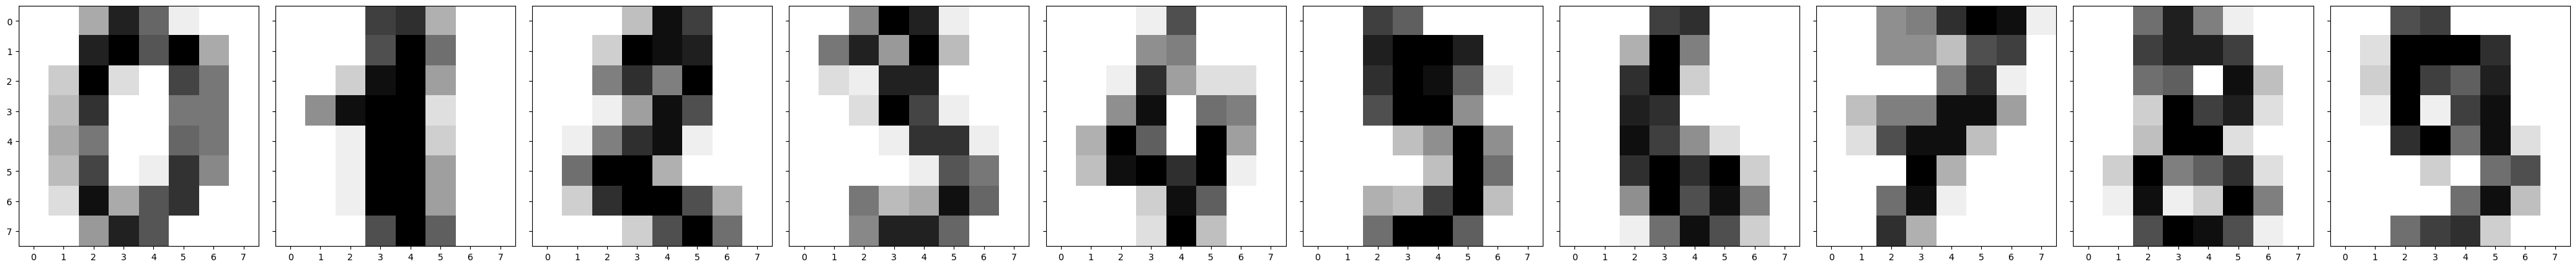

In [13]:
# Plot image data

dataset = datasets.load_digits()

Xs = (dataset.data,)

image_shape = (8, 8)

_, _ = plot_panel_images(
    Xs, 
    image_shape=image_shape,
    n_columns_plot=10, 
    scale_plot=4, 
    n_fig=1, 
    figsize=(16, 16)
)   

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


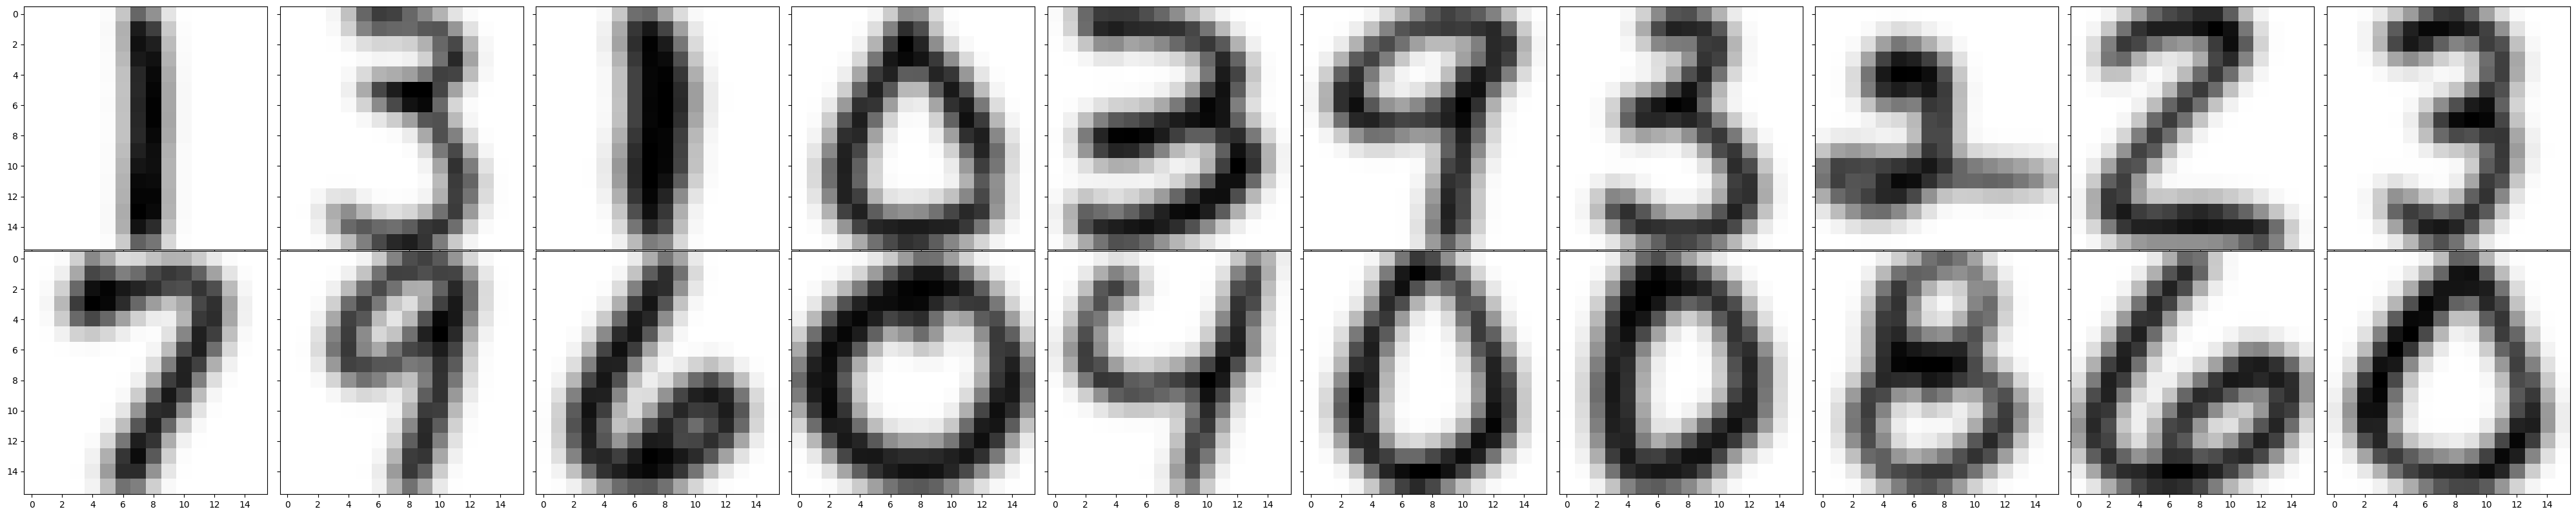

In [14]:
from sklearn.datasets import fetch_openml


# Handwritten digits from envelopes by the U.S. Postal Service
# Source: https://www.openml.org/d/41070
dataset = fetch_openml(data_id=41082, as_frame=True)

dataset.data.head(4)

X = dataset.data.to_numpy()
y = dataset.target.to_numpy()

n_samples = 1000
X = X[:n_samples, :]

test_size = 0.5
X_train, X_test = train_test_split(X, test_size=test_size, random_state=2)

image_shape = (16, 16)

Xs = (X_train, X_test)

_, _ = plot_panel_images(
    Xs, 
    image_shape=image_shape,
    n_columns_plot=10, 
    scale_plot=4, 
    n_fig=1, 
    figsize=(20, 16)
)

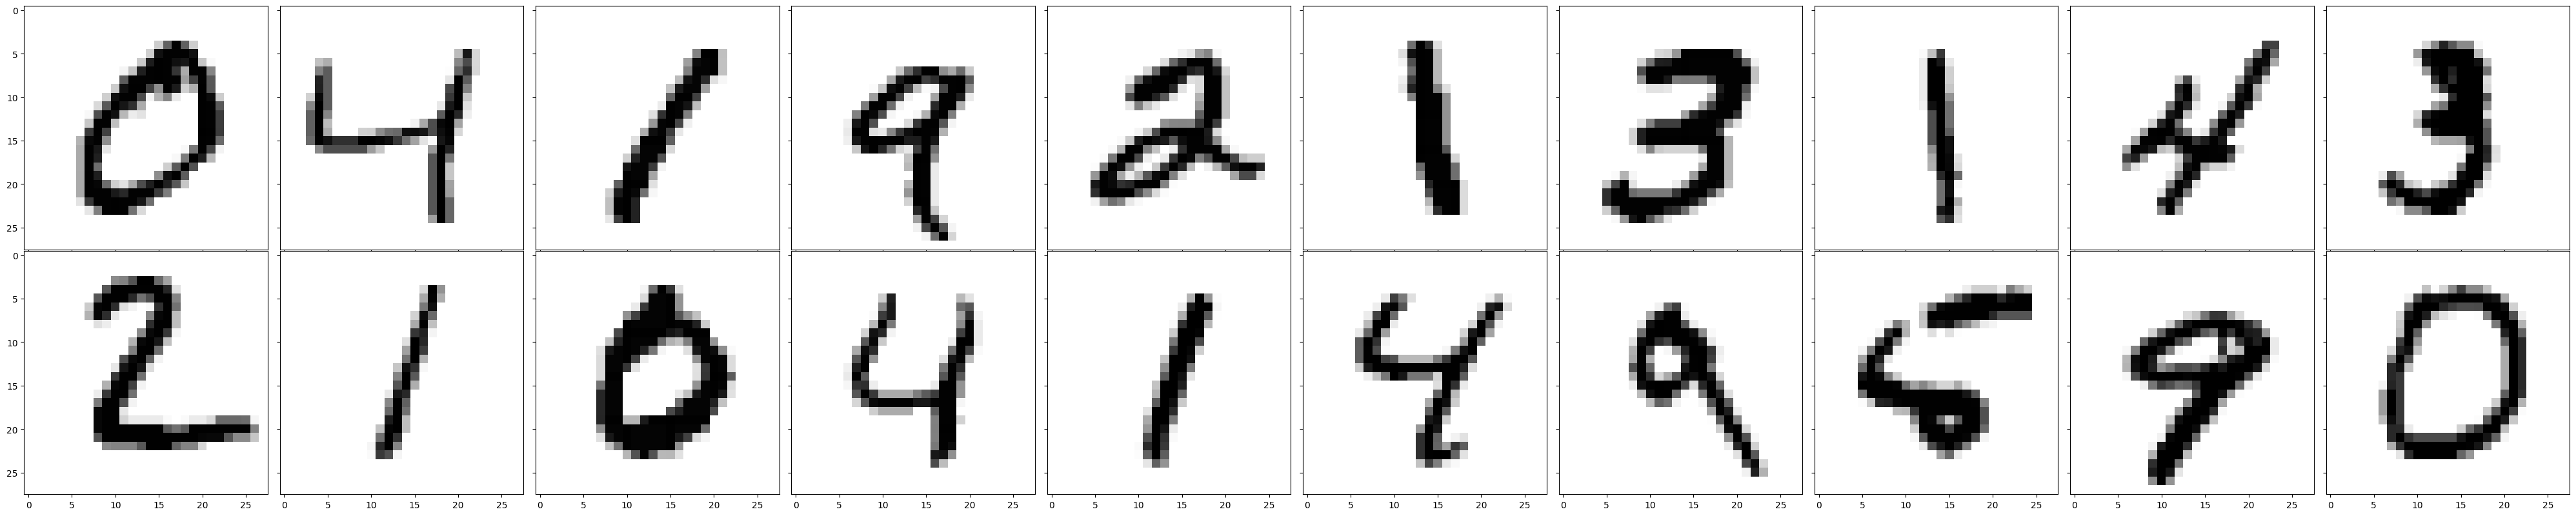

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# MNIST data
# http://yann.lecun.com/exdb/mnist/

# training data
dataset_train_df = pd.read_csv('mnist_train.csv', sep=',')
dataset_train = dataset_train_df.to_numpy()

# test data
dataset_test_df = pd.read_csv('mnist_test.csv', sep=',')
dataset_test = dataset_test_df.to_numpy()

n_samples = 1000
X_train = dataset_train[:n_samples, 1:]
y_train = dataset_train[:n_samples, 0]

X_test = dataset_test[:n_samples, 1:]
y_test = dataset_test[:n_samples, 0]


image_shape = (28, 28)

Xs = (X_train, X_test)

_, _ = plot_panel_images(
    Xs, 
    image_shape=image_shape,
    n_columns_plot=10, 
    scale_plot=4, 
    n_fig=1, 
    figsize=(20, 16)
)

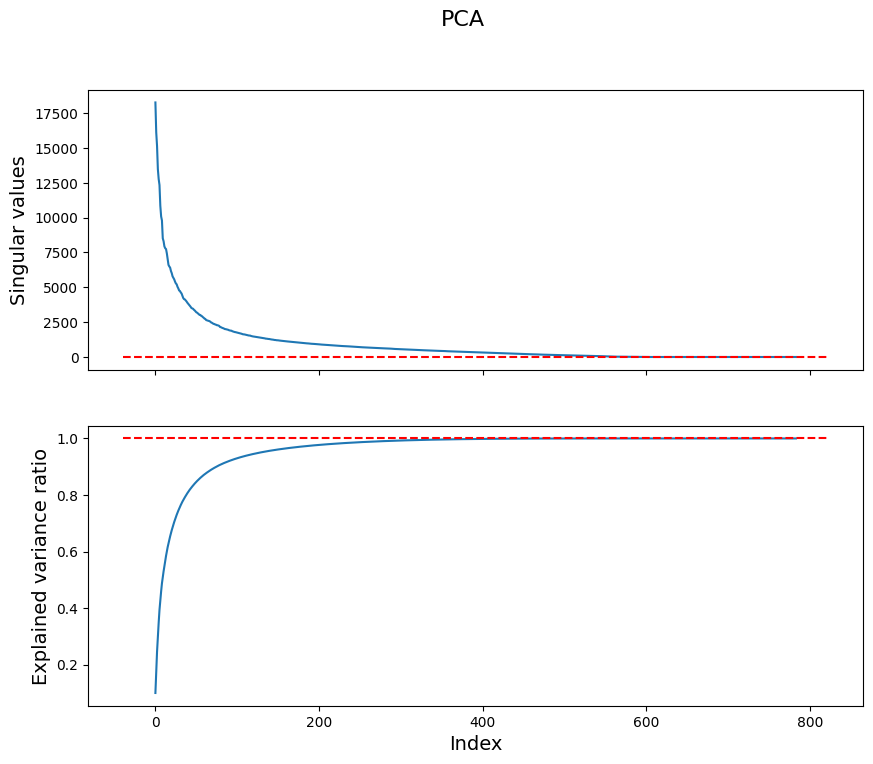

In [16]:
# Linear PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
plot_pca(pca, X_train_pca, n_fig=1)


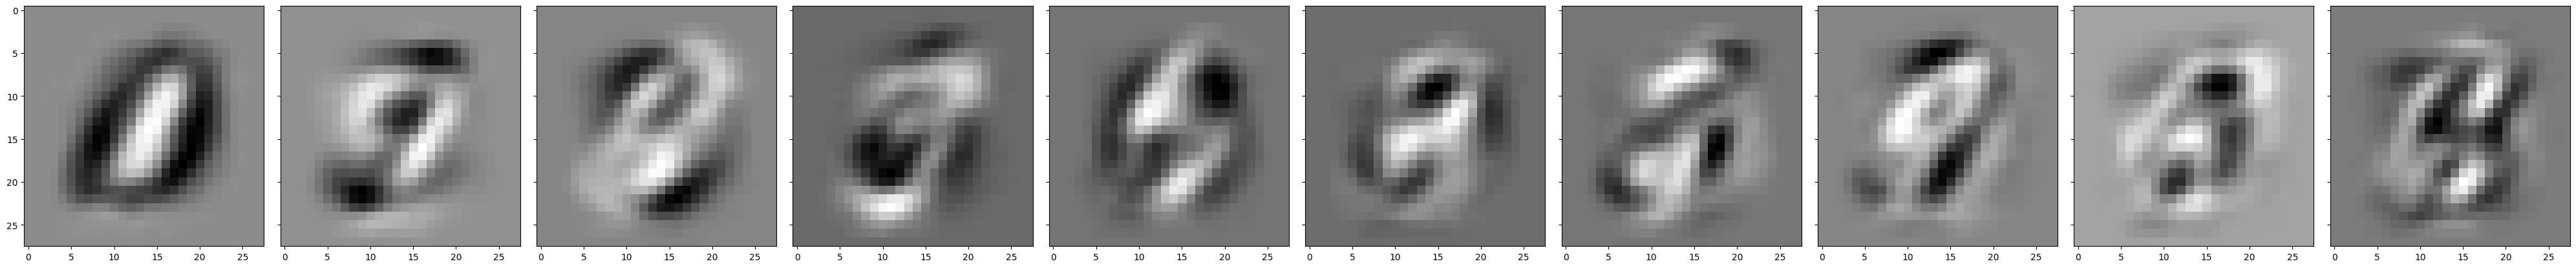

In [17]:
# First few principal components

Xs = (pca.components_, )

_, _ = plot_panel_images(
    Xs, 
    image_shape=image_shape,
    n_columns_plot=10, 
    scale_plot=4, 
    n_fig=1, 
    figsize=(20, 16)
)

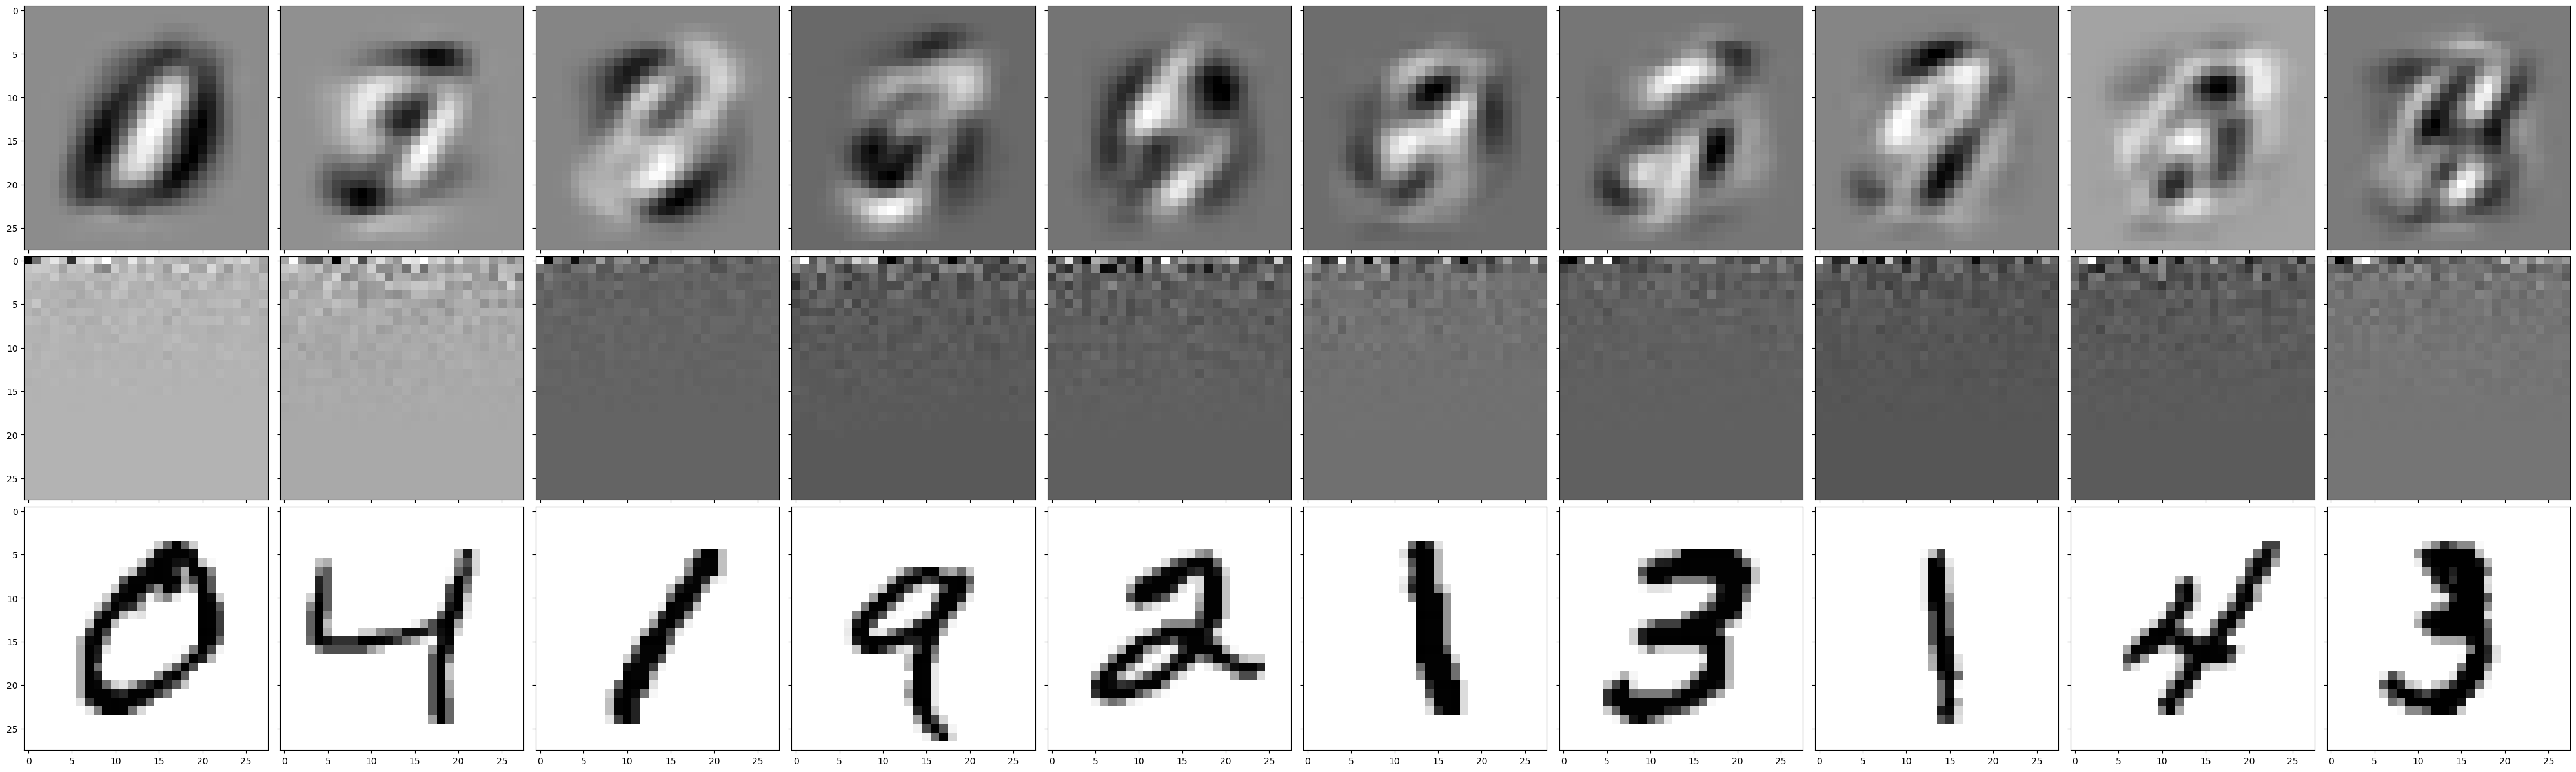

In [18]:
# Projections onto the principal components

Xs = (pca.components_, X_train_pca, X_train)

_, _ = plot_panel_images(
    Xs, 
    image_shape=image_shape,
    n_columns_plot=10, 
    scale_plot=4, 
    n_fig=1, 
    figsize=(20, 16)
)

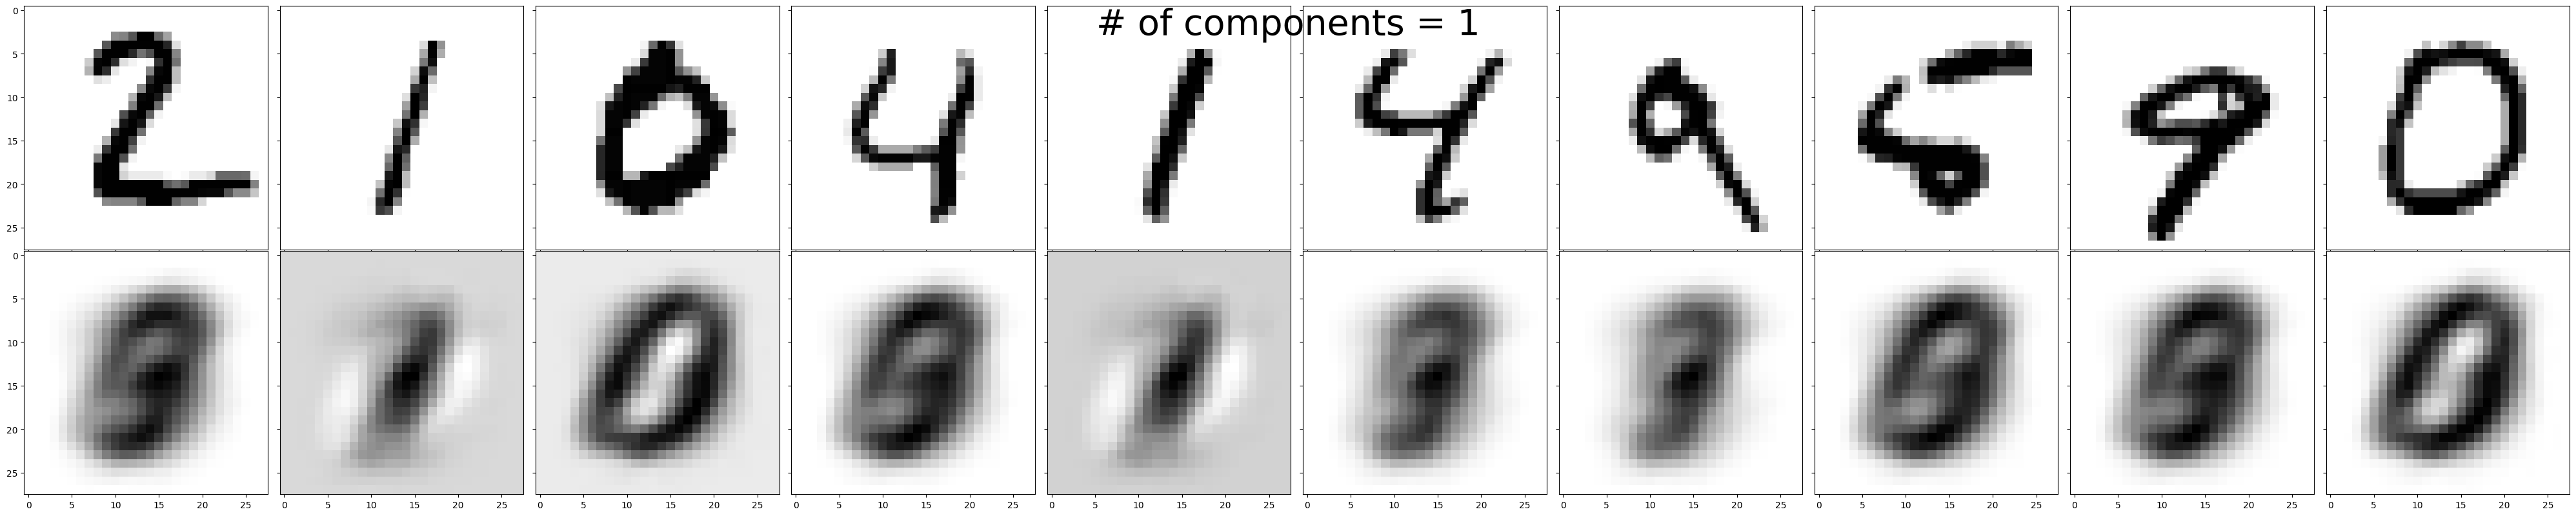

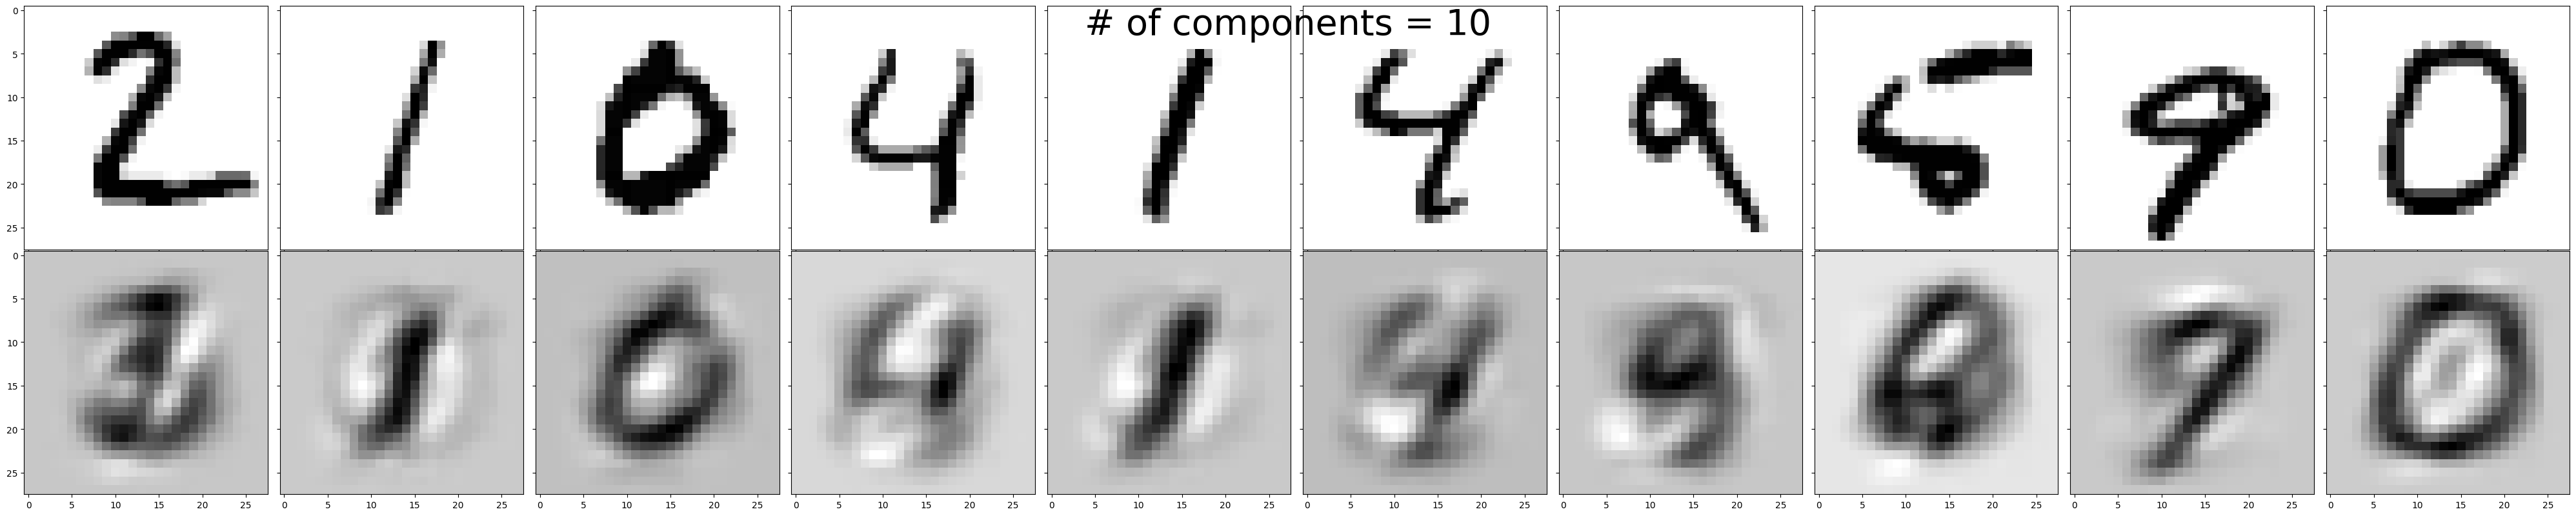

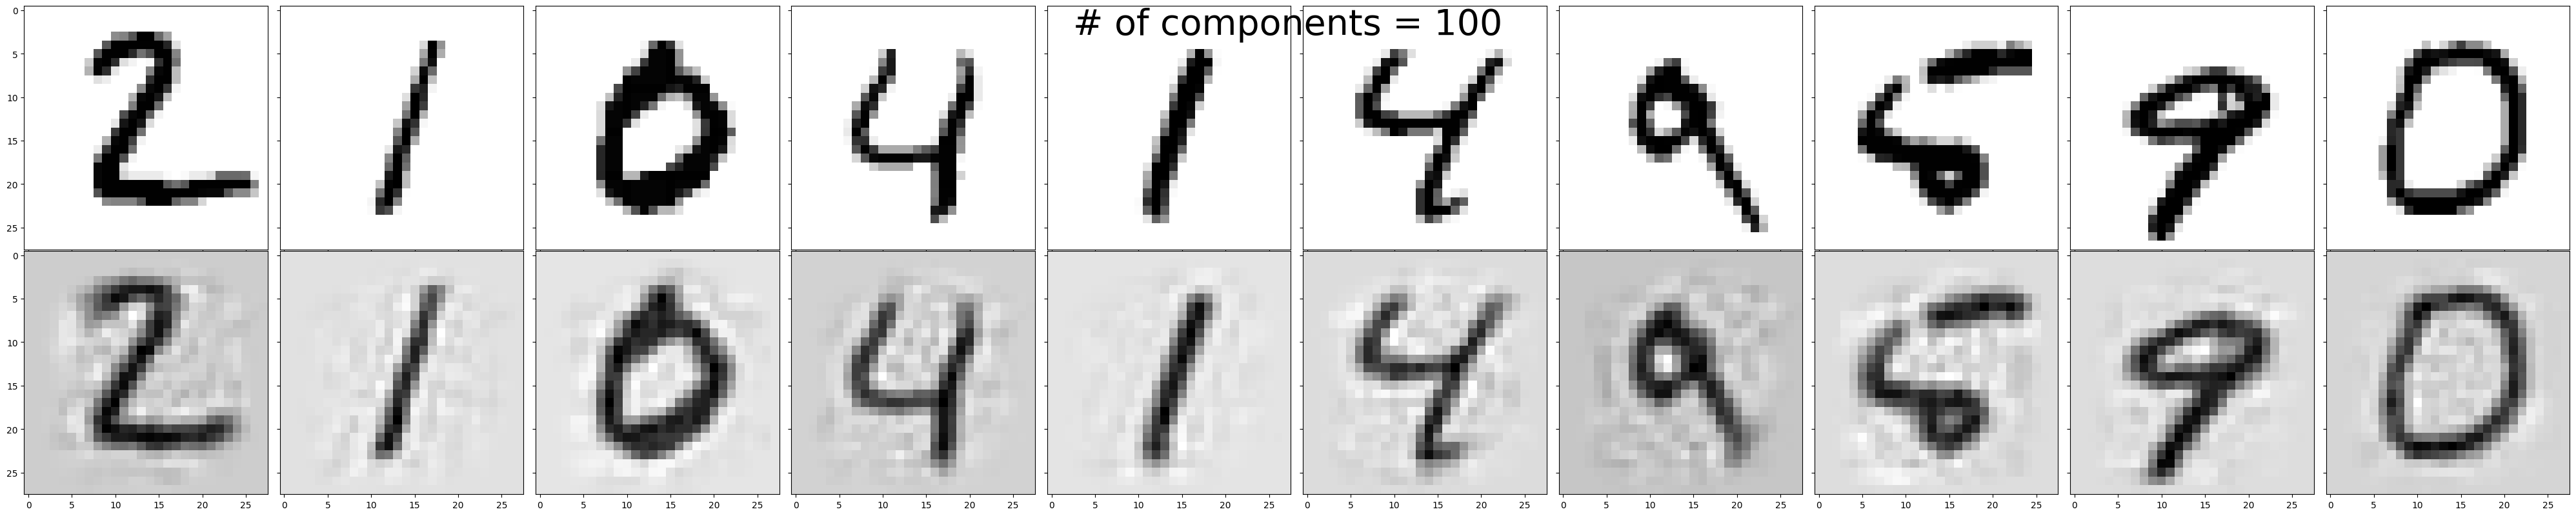

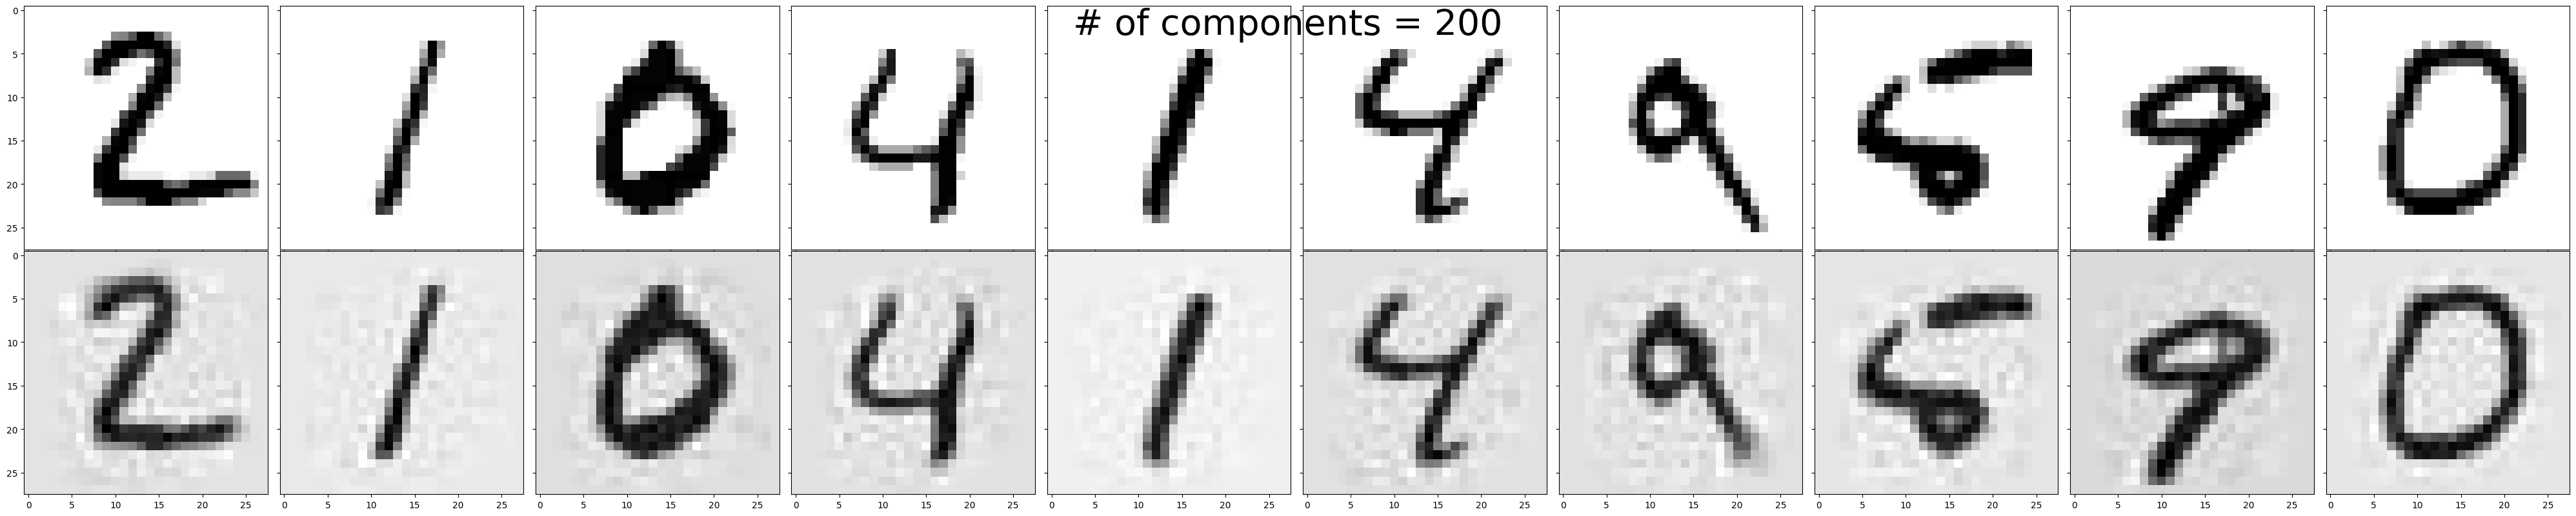

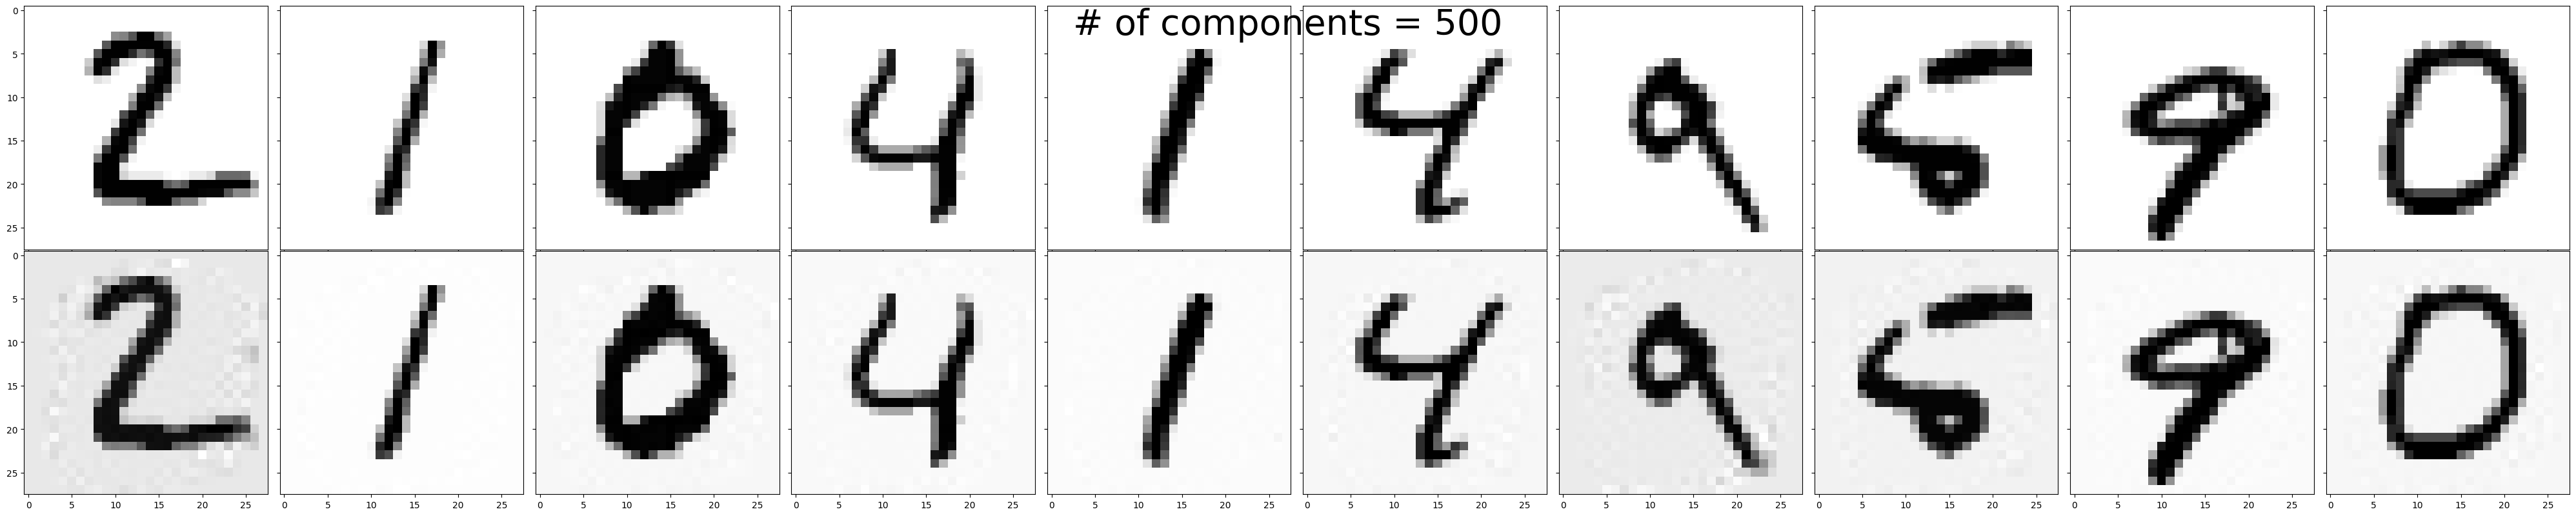

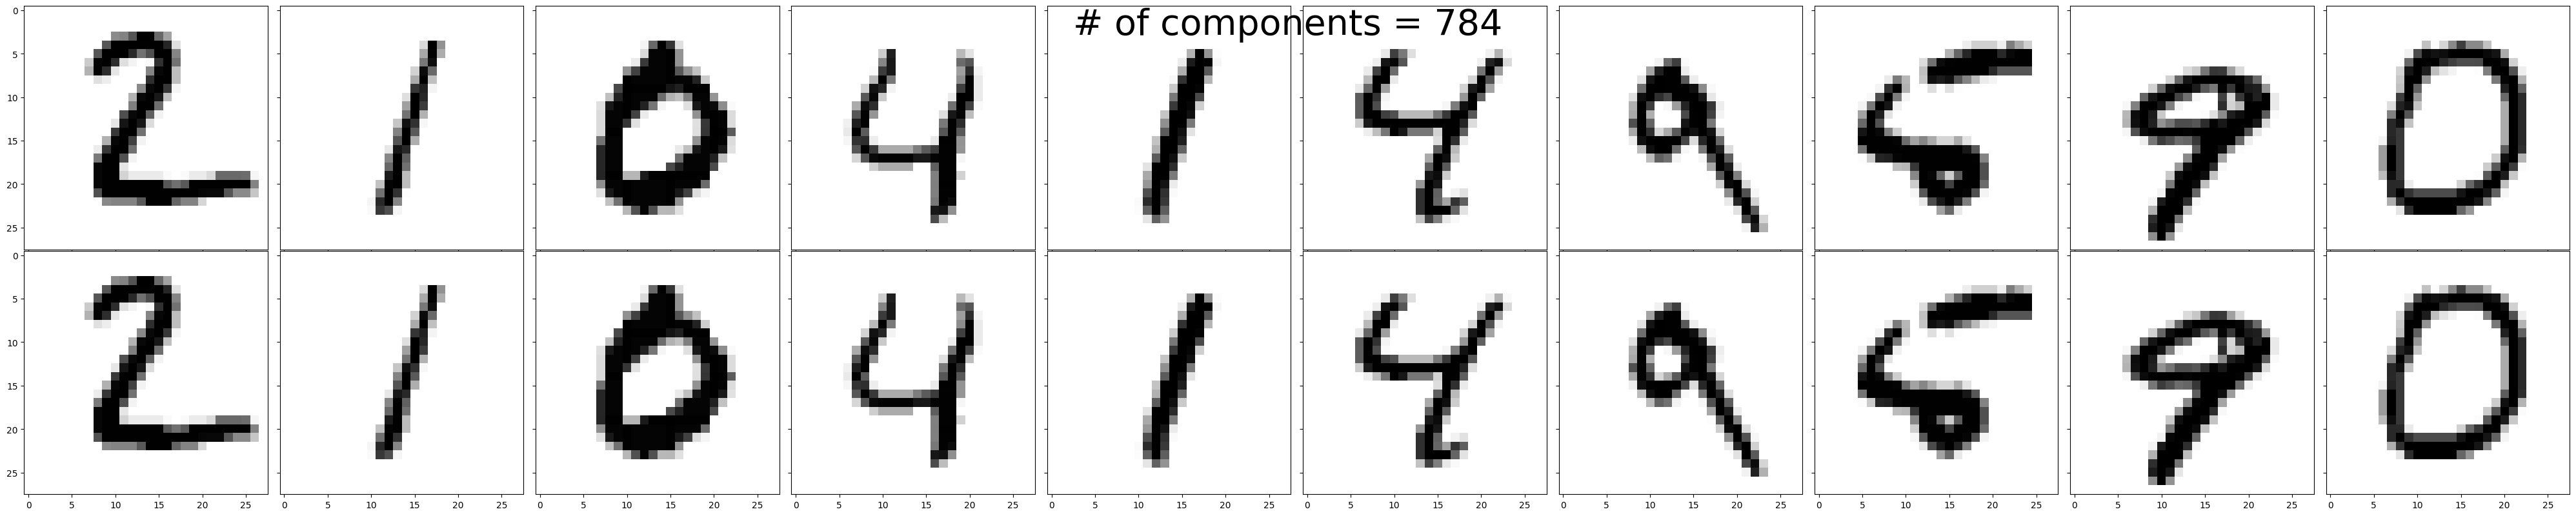

In [19]:
# Image reconstruction form the projections onto PCA components

n_components = [1, 10, 100, 200, 500, 28*28]

for n in n_components:

    pca = PCA(n_components=n)

    X_train_pca = pca.fit_transform(X_train)

    X_train_back = pca.inverse_transform(X_train_pca)

    Xs = (X_train, X_train_back)

    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_back = pca.inverse_transform(X_test_pca)
    
    Xs = (X_test, X_test_back)

    fig, _ = plot_panel_images(
        Xs, image_shape=image_shape,
        n_columns_plot=10, 
        scale_plot=4, 
        n_fig=n+1, 
        figsize=(20, 16),
    )
    fig.suptitle('# of components = {}'.format(n), fontsize=40)

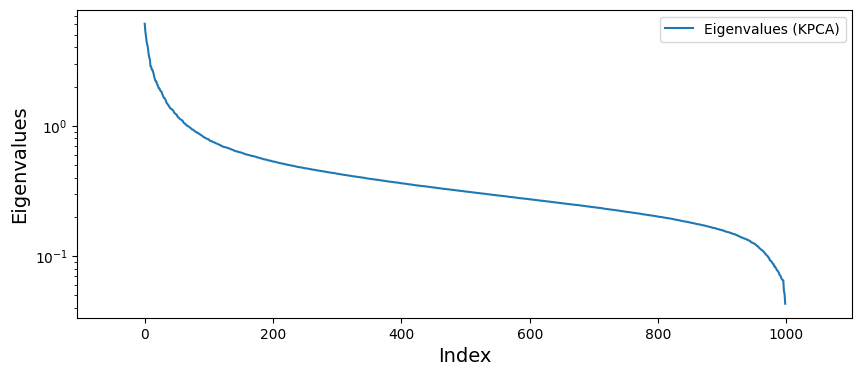

In [20]:
# Kernel PCA

gamma = 1.0e-7
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=gamma)
X_train_kpca = kpca.fit_transform(X_train)
X_train_back = kpca.inverse_transform(X_train_kpca)

eigenvalues = np.sqrt(kpca.eigenvalues_)

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (10, 4), num=1)
indices_plot = range(len(eigenvalues))
fontsize = 14
ax.semilogy(indices_plot, eigenvalues, label='Eigenvalues (KPCA)')
x_min, x_max = ax.get_xlim()

_ = ax.hlines(0.0, x_min, x_max, color='r', linestyle='dashed')
_ = ax.set_xlabel('Index', fontsize=fontsize)
_ = ax.set_ylabel('Eigenvalues', fontsize=fontsize)
_ = ax.legend()

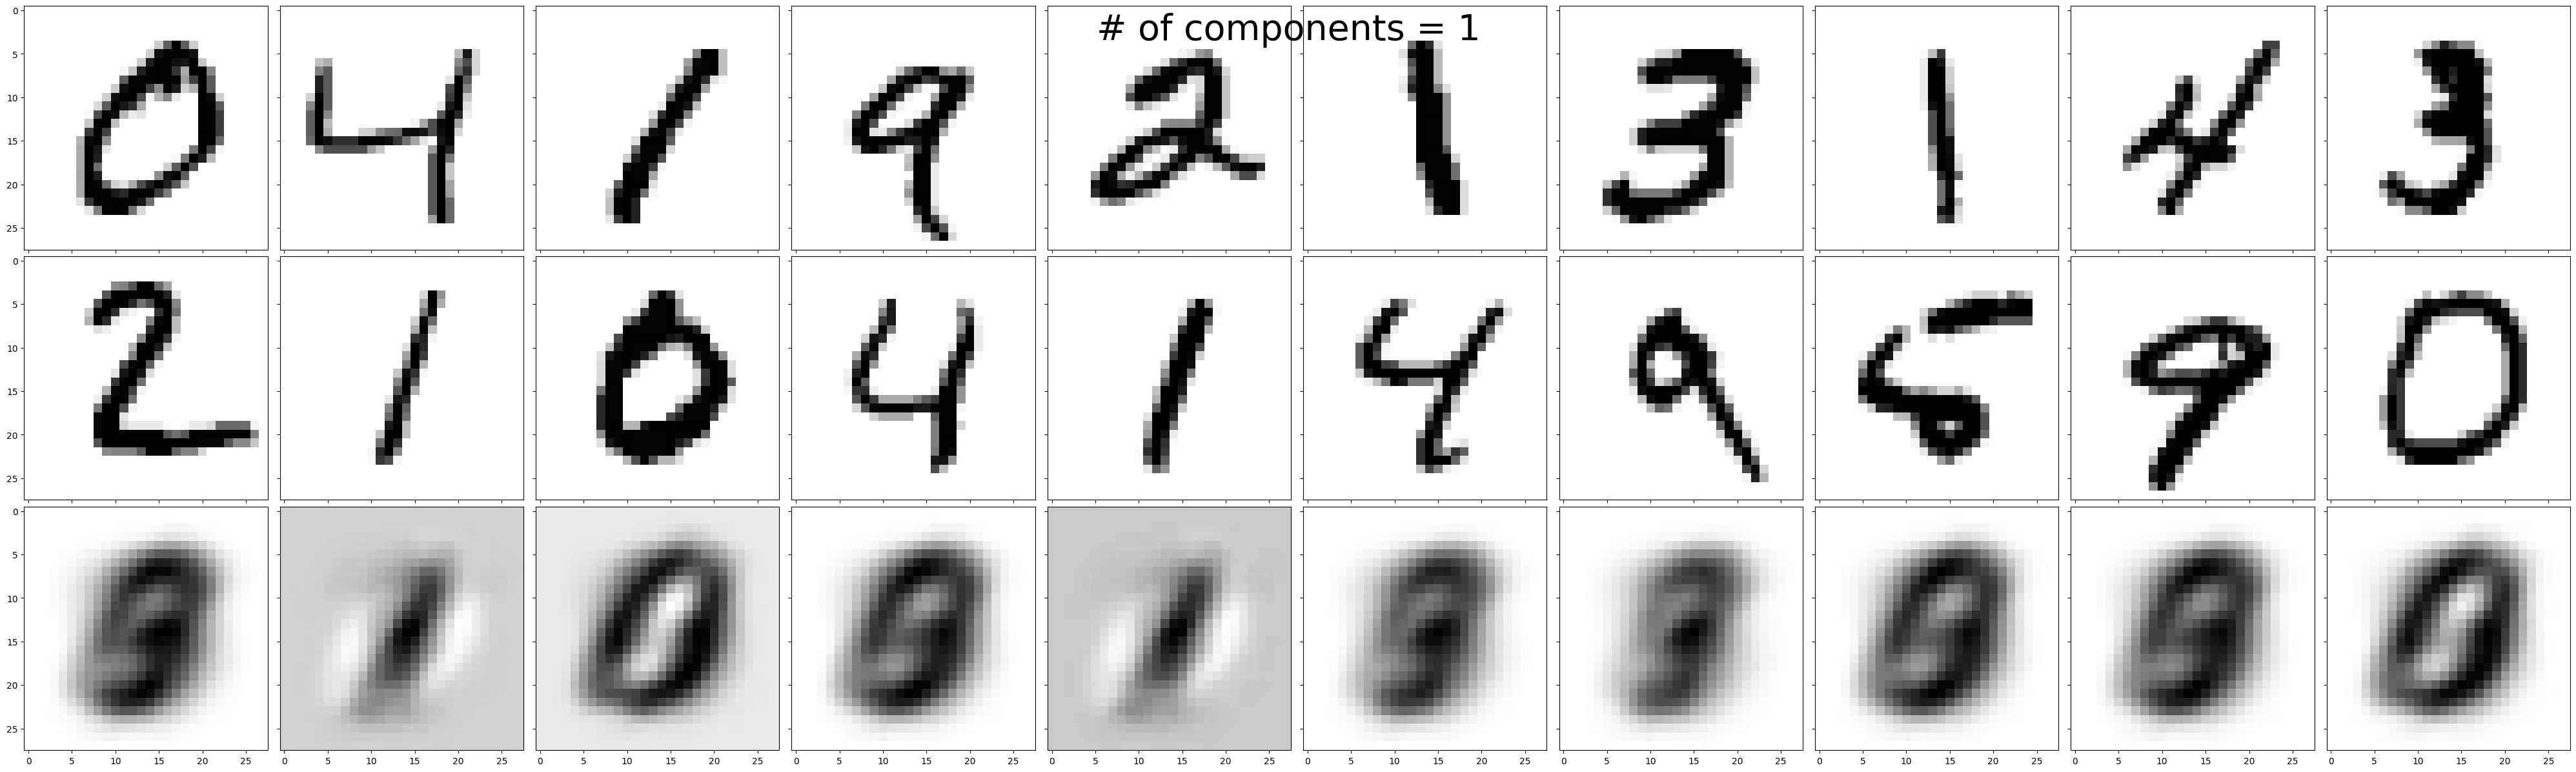

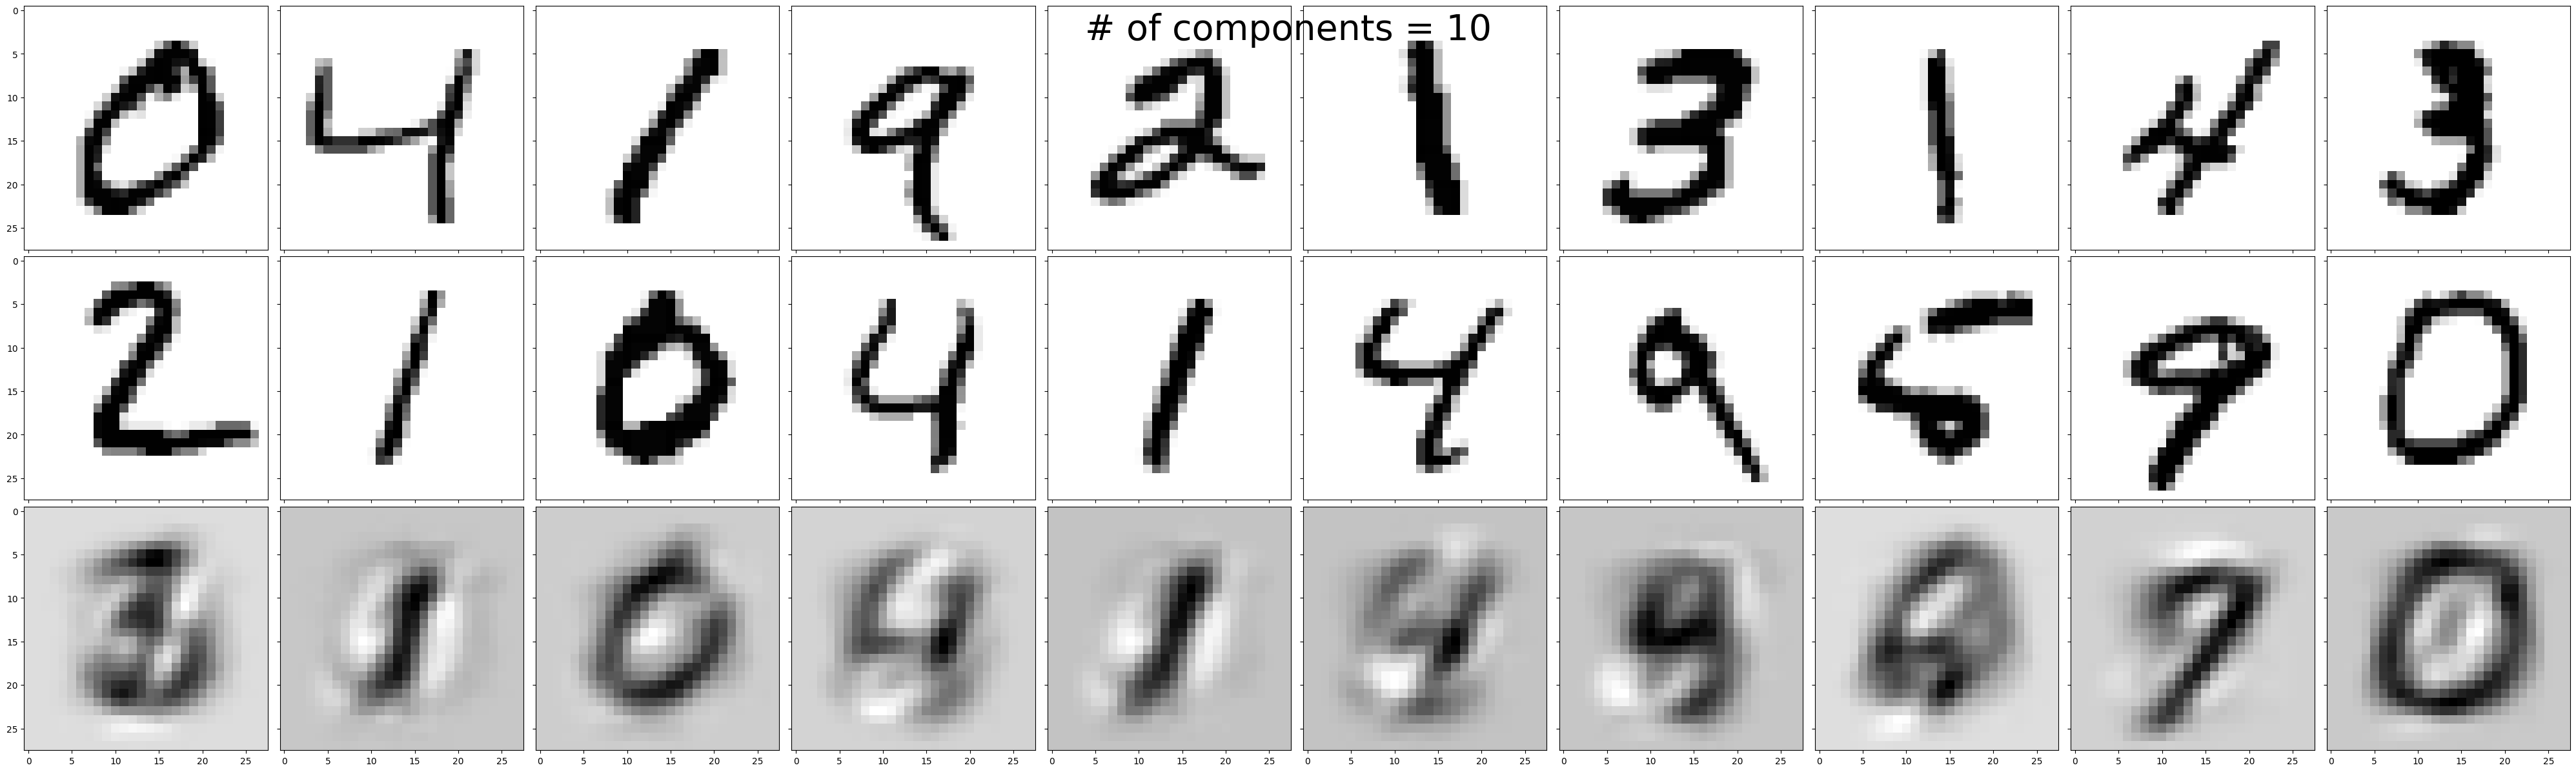

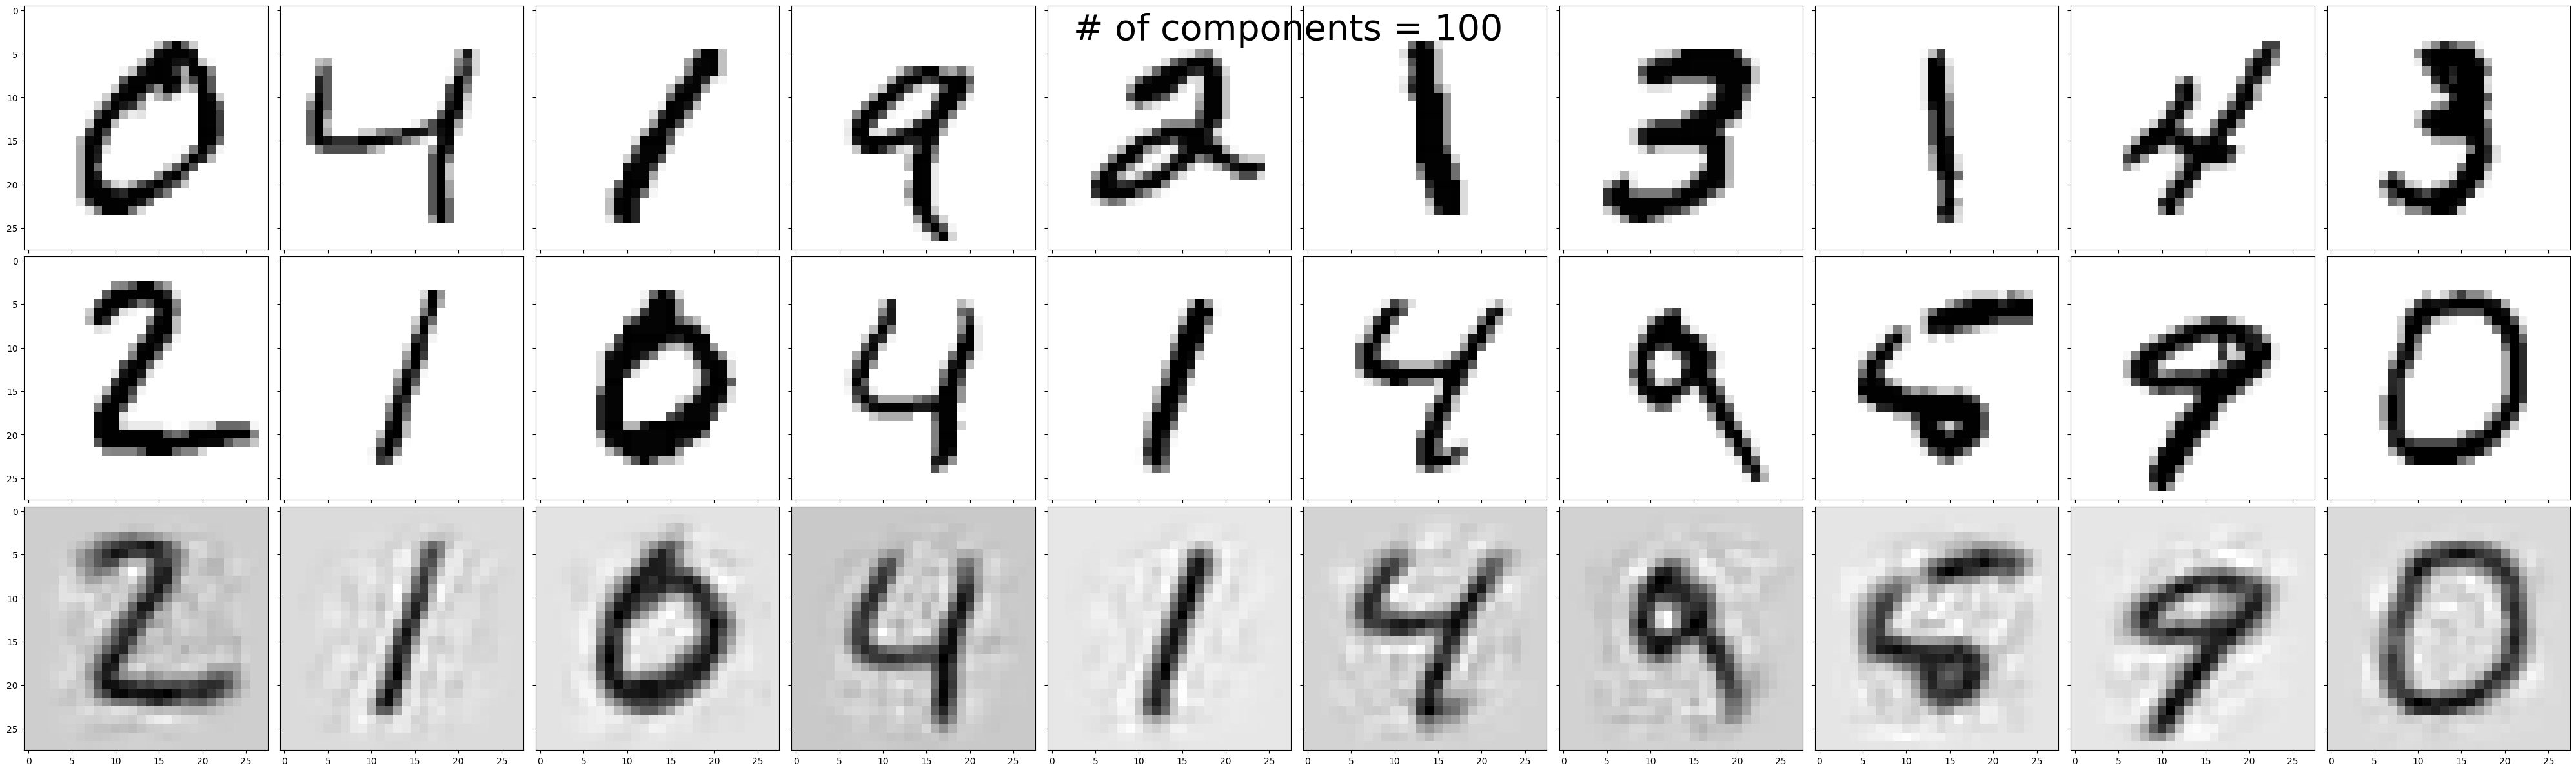

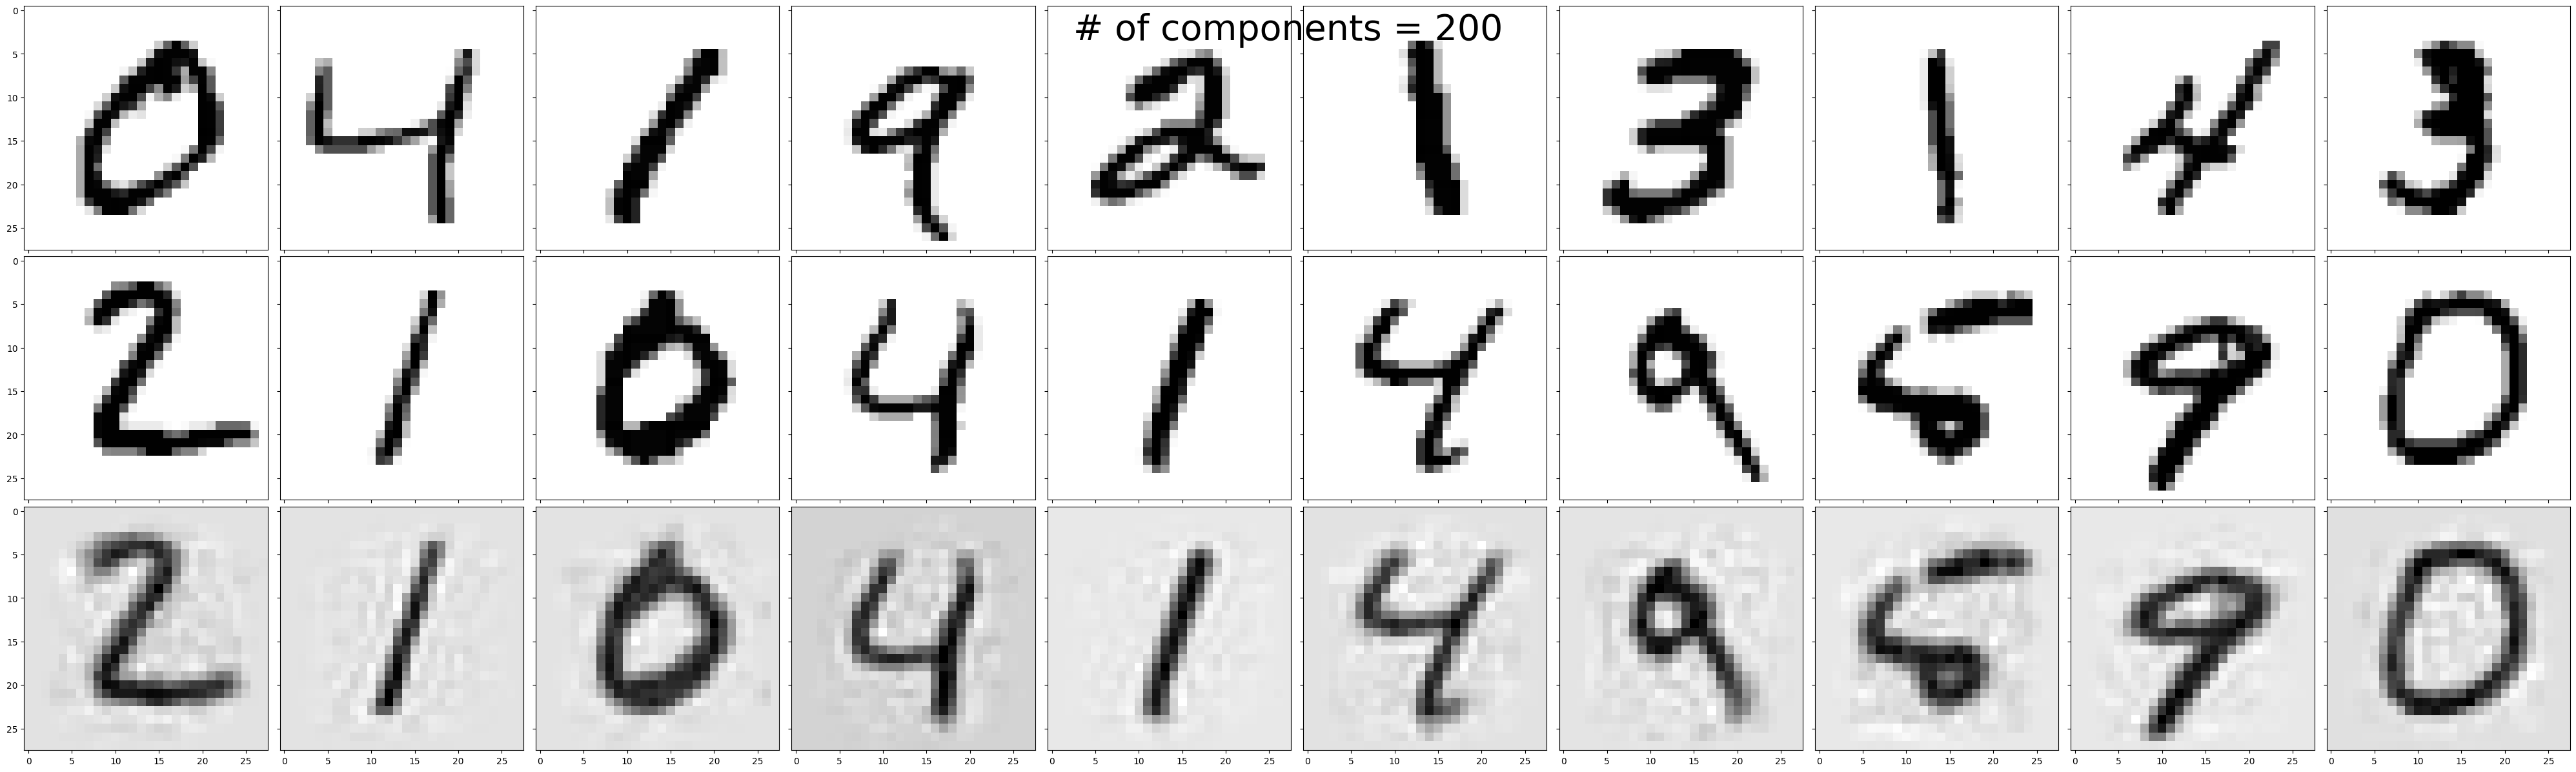

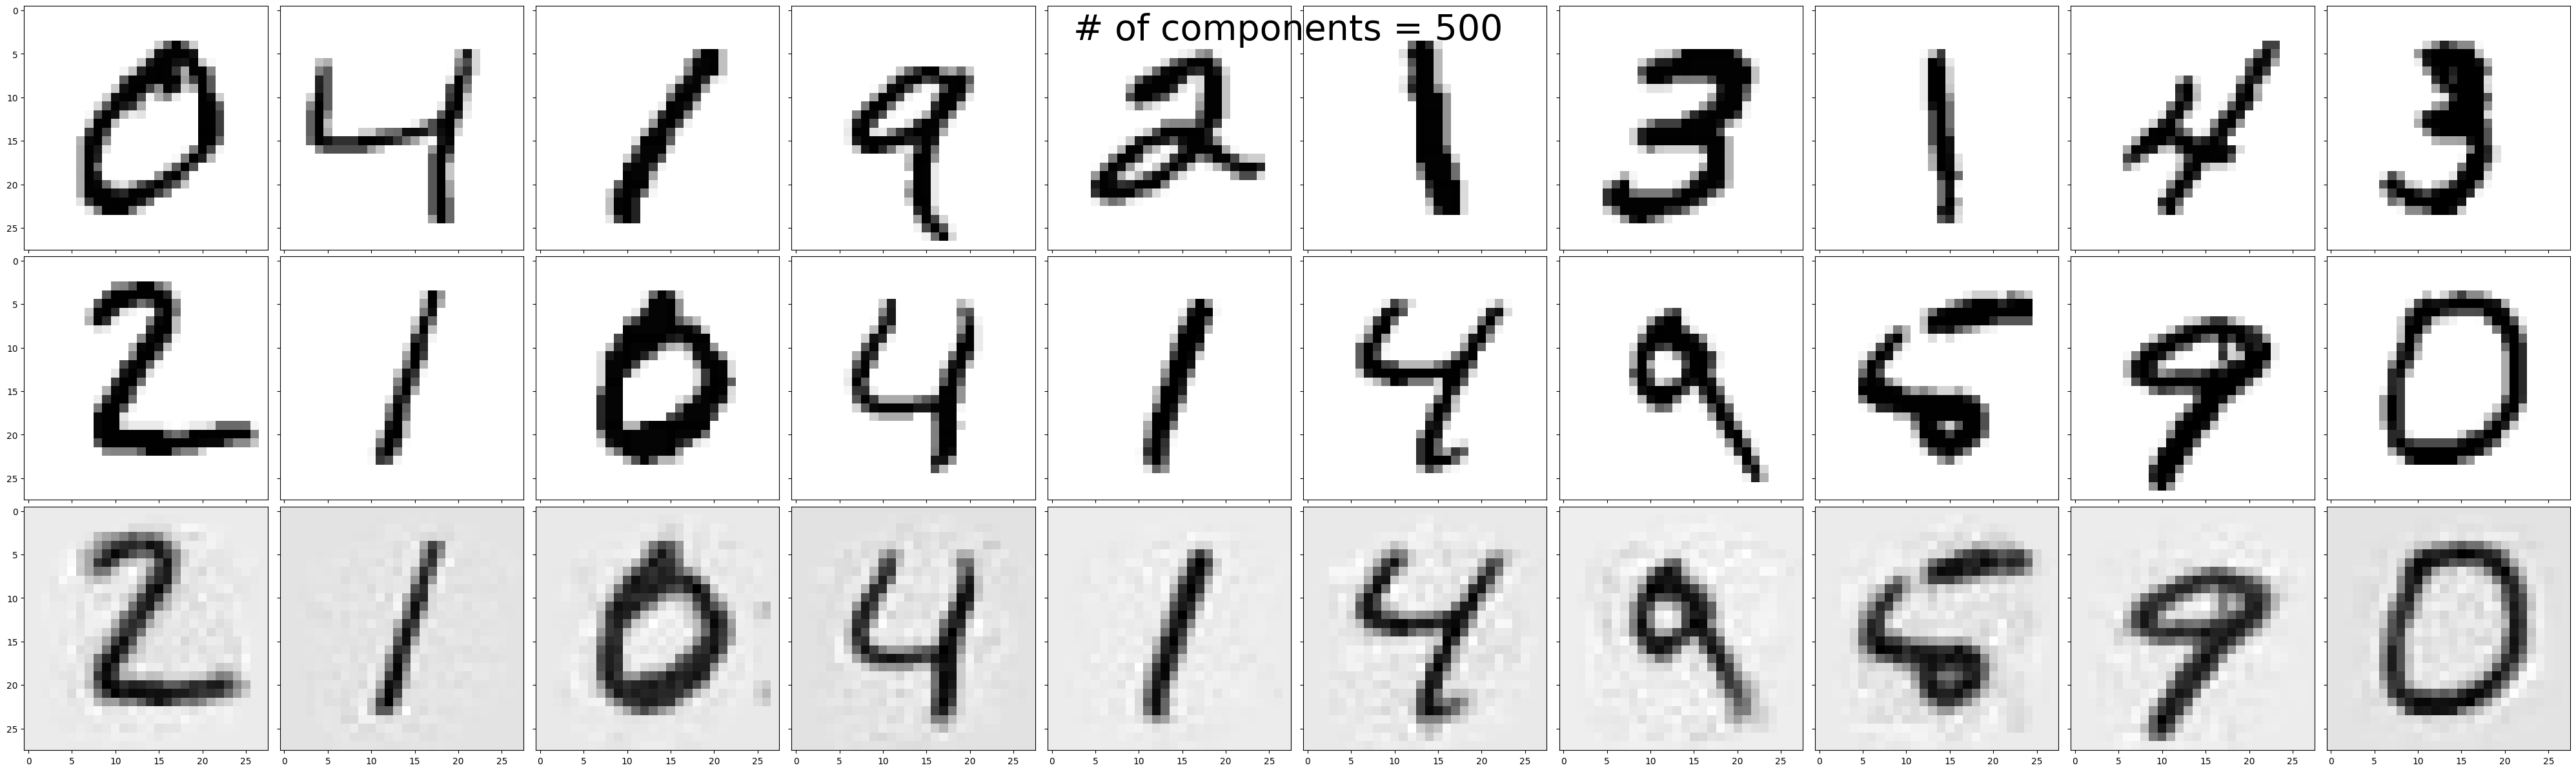

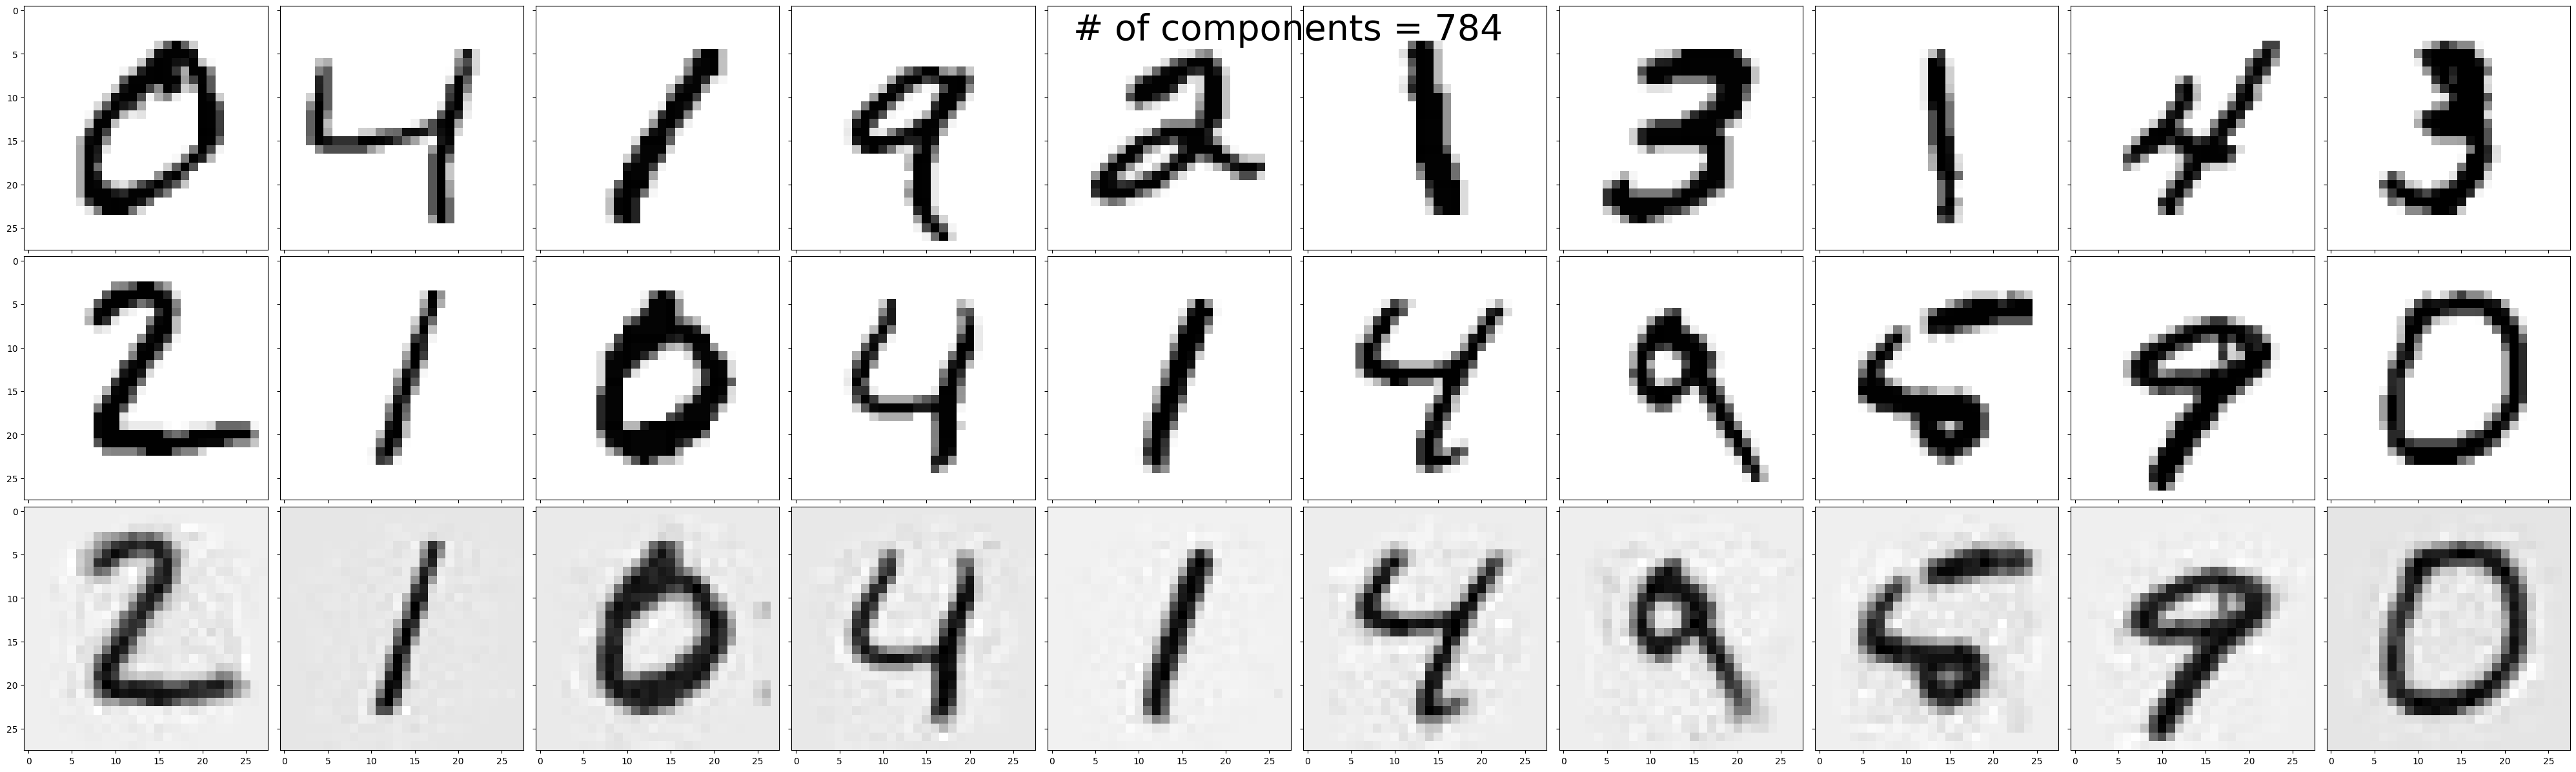

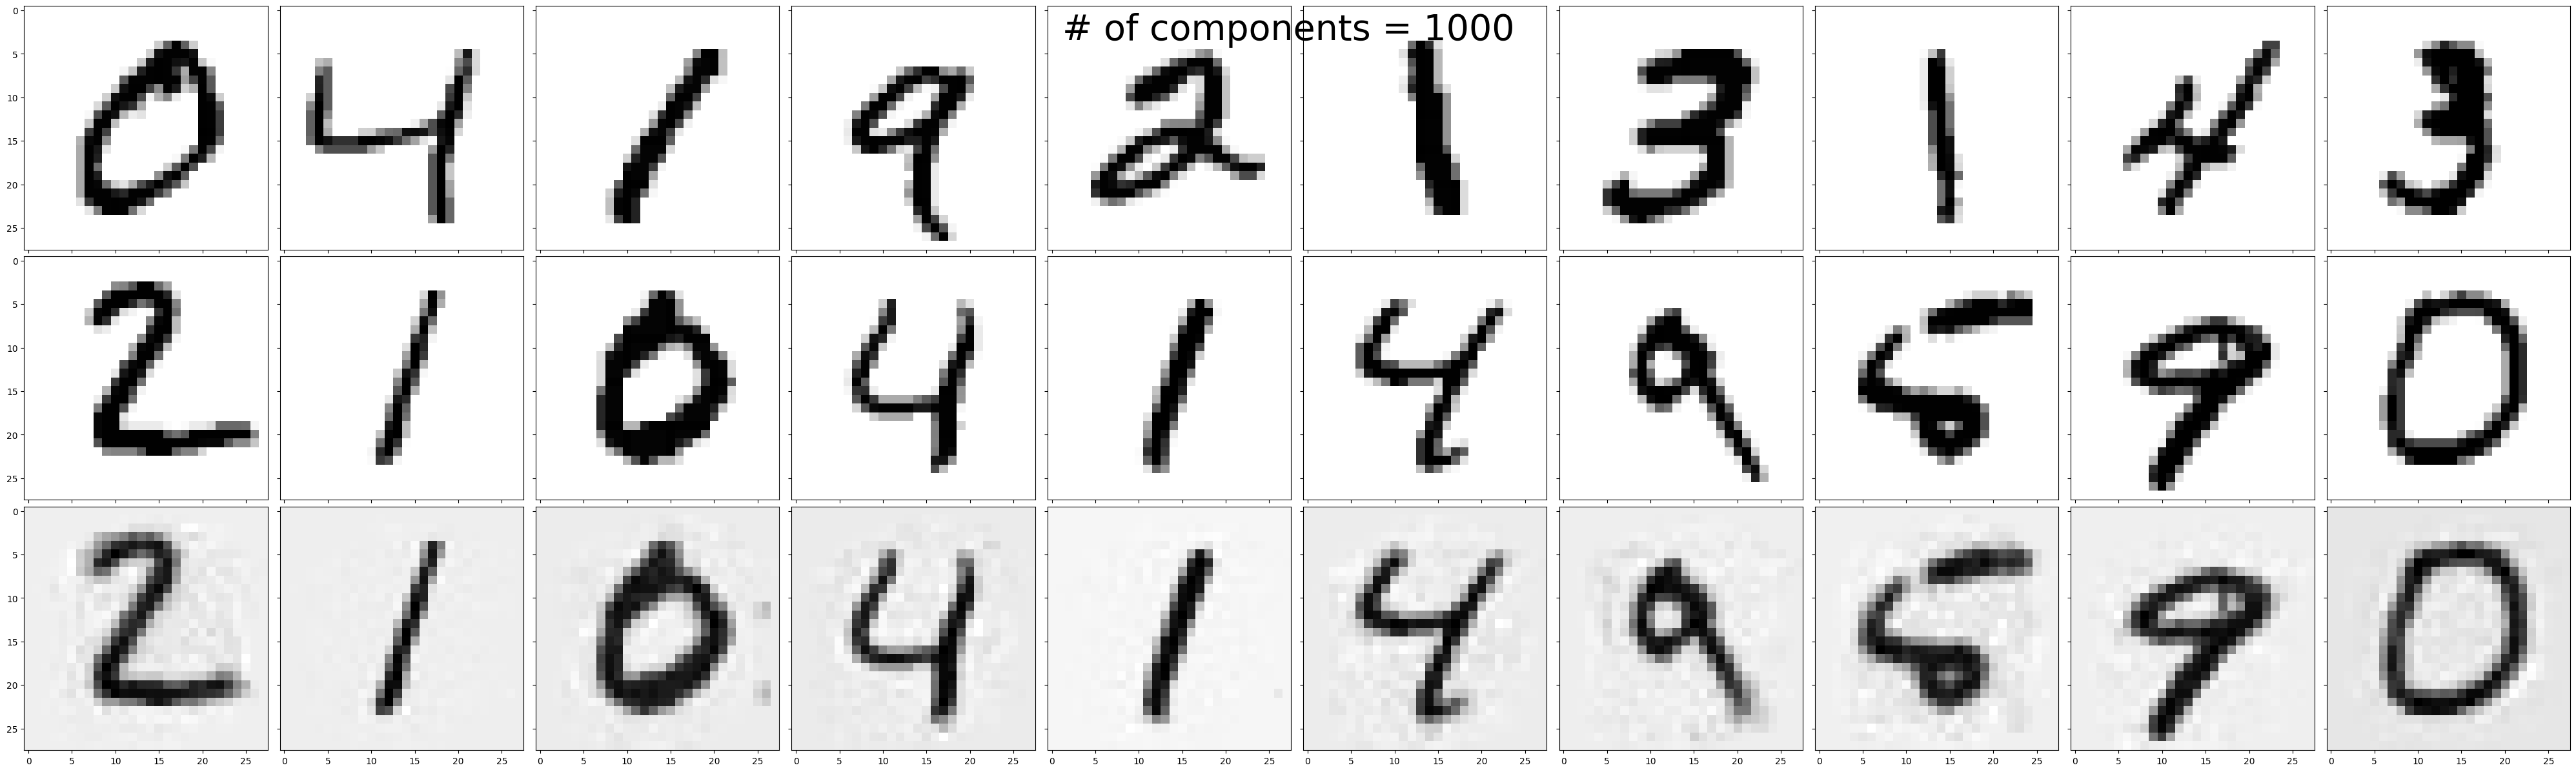

In [21]:
# Image reconstruction form the projections onto KPCA components

n_components = [1, 10, 100, 200, 500, 28*28, 1000]

gamma = 1.0e-7
alpha = 1.0e-10
kernel = 'rbf'

permuted_indices = np.random.permutation(len(X_train))
X_train_permuted = X_train[permuted_indices, :]

fontsize = 14
for n in n_components:
    kpca = KernelPCA(
        n_components=n, 
        kernel=kernel, 
        fit_inverse_transform=True, 
        gamma=gamma,
        alpha=alpha,
    )

    kpca.fit_transform(X_train)

    X_kpca = kpca.transform(X_train_permuted)
    X_train_permuted_back = kpca.inverse_transform(X_kpca)

    Xs = (X_train, X_train_permuted, X_train_permuted_back)

    kpca.fit(X_train)
    X_test_kpca = kpca.transform(X_test)
    X_test_back = kpca.inverse_transform(X_test_kpca)
    
    Xs = (X_train, X_test, X_test_back)

    
    fig, _ = plot_panel_images(
        Xs, 
        image_shape=image_shape,
        n_columns_plot=10, 
        scale_plot=4, 
        n_fig=n+1, 
        figsize=(20, 16),
    )
    fig.suptitle('# of components = {}'.format(n), fontsize=40)

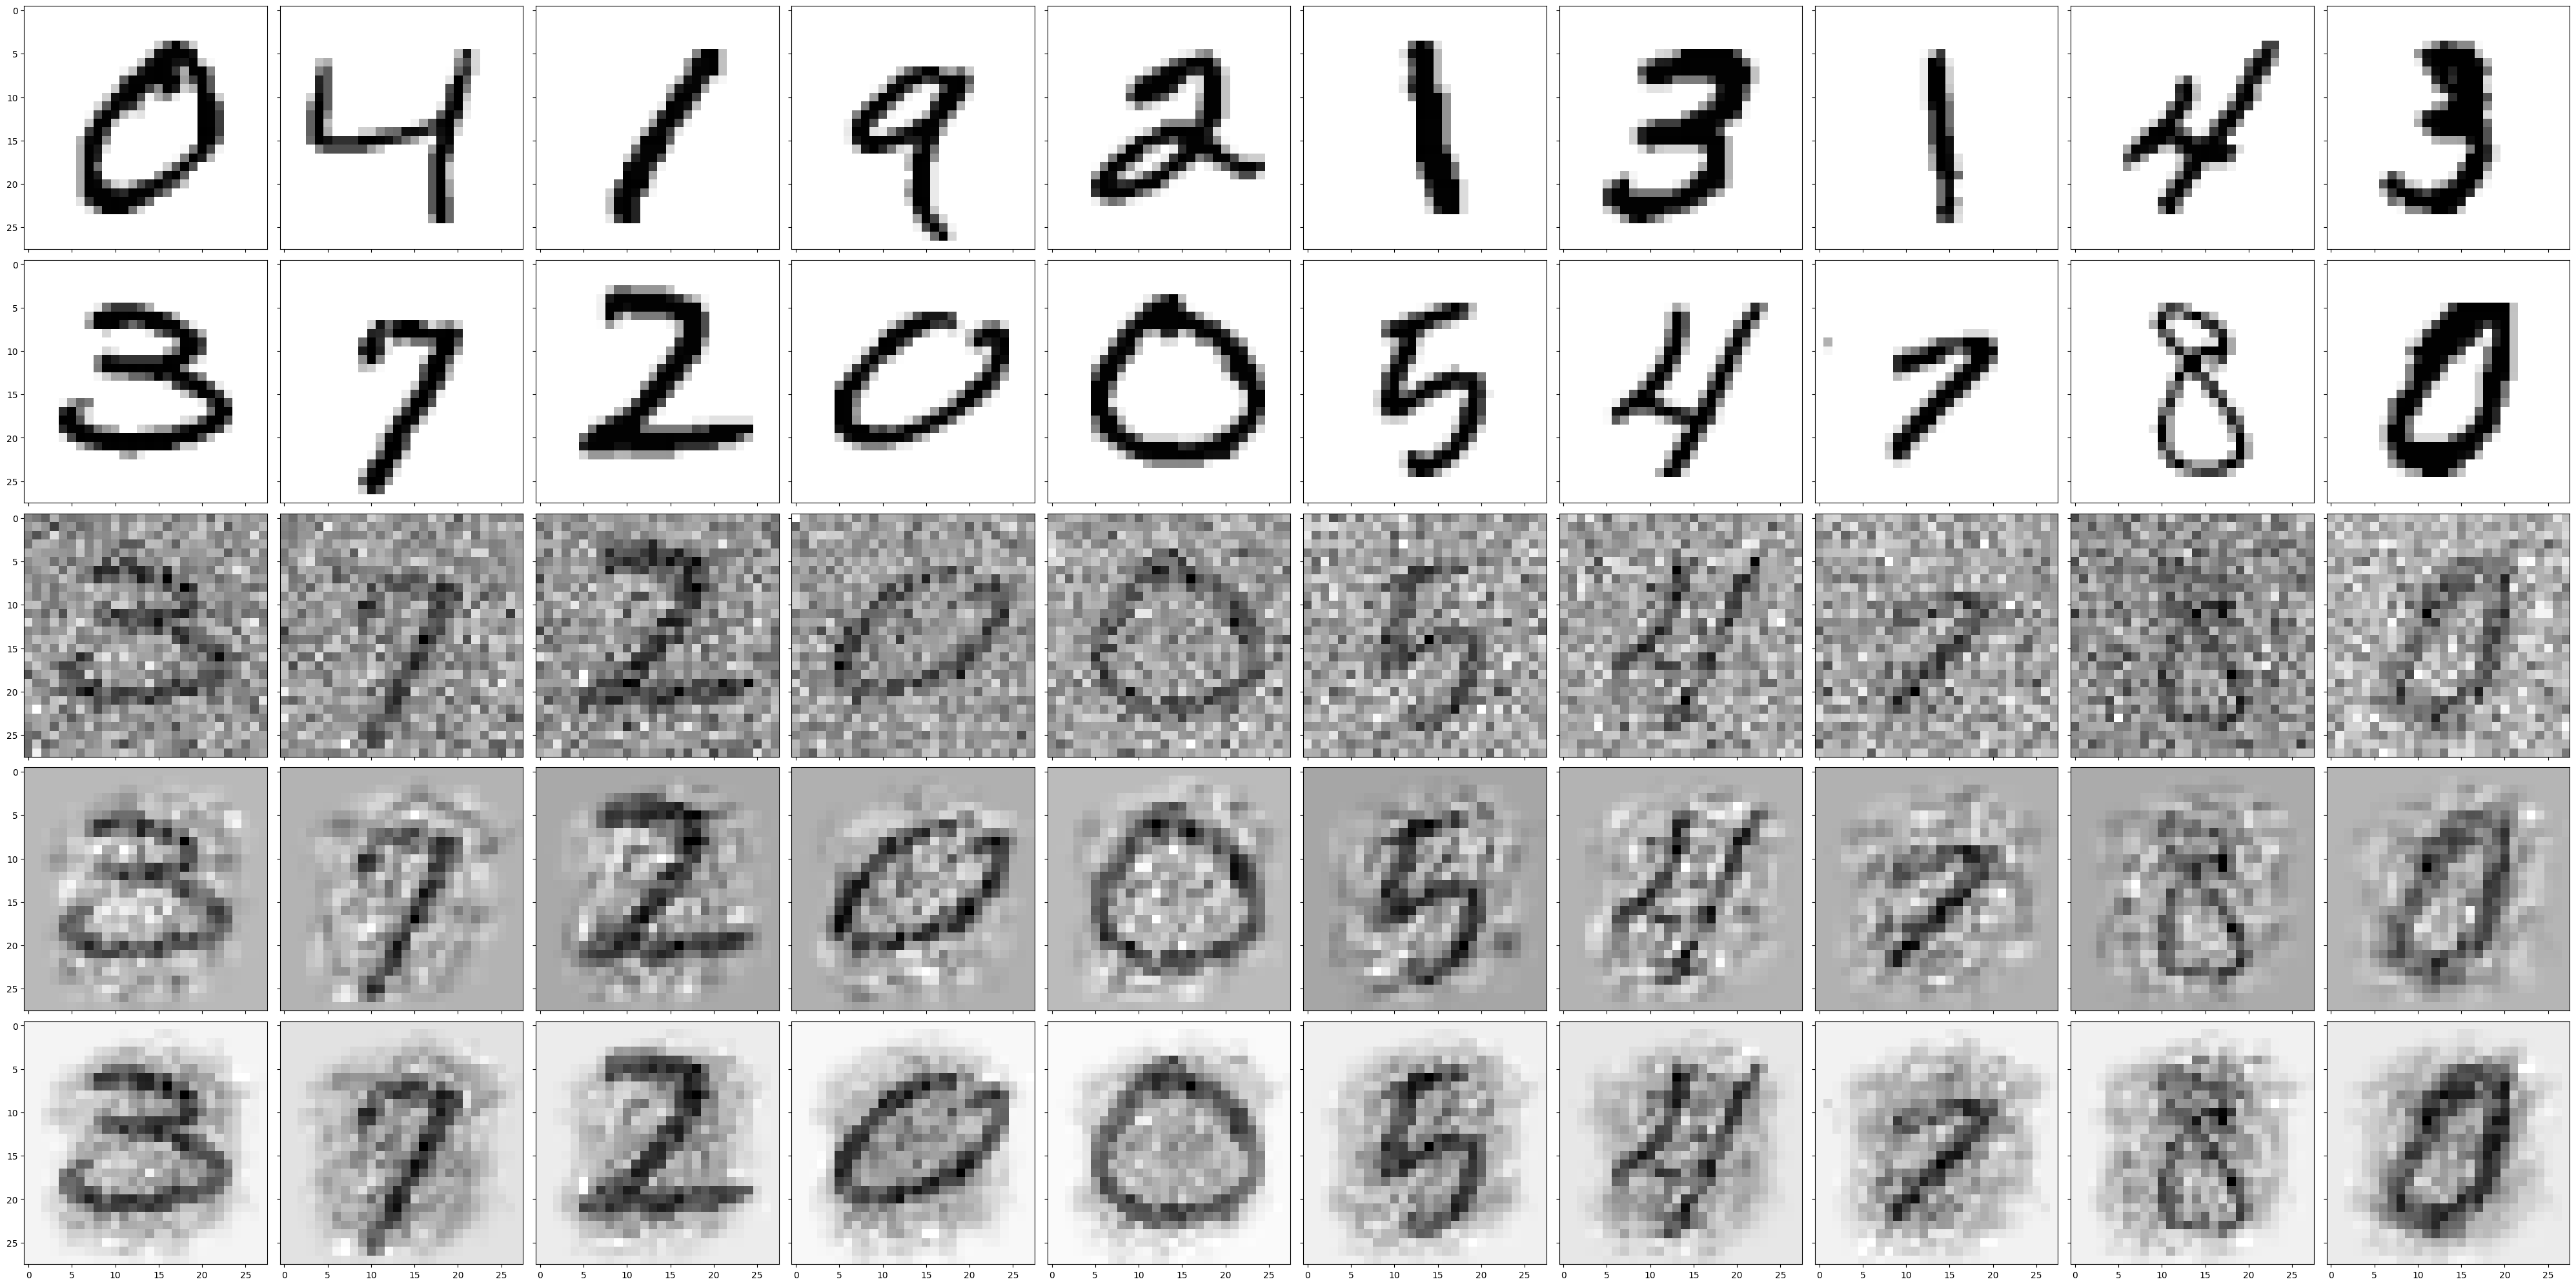

In [22]:
# Denoising of images

sigma_noise = 100.0

X_train_permuted_noisy = X_train_permuted \
                         + sigma_noise*np.random.randn(*np.shape(X_train_permuted))

n_components = 200
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_train_permuted_noisy_pca = pca.transform(X_train_permuted_noisy)
X_train_permuted_noisy_back_pca = pca.inverse_transform(X_train_permuted_noisy_pca)

n_components = 200
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_train_permuted_noisy_pca = pca.transform(X_train_permuted_noisy)
X_train_permuted_noisy_back_pca = pca.inverse_transform(X_train_permuted_noisy_pca)

n_components = 1000

kernel = 'rbf'
gamma = 1.2e-7
alpha = 1.0e-12

kpca = KernelPCA(n_components=n_components,
                 kernel=kernel, 
                 fit_inverse_transform=True, 
                 gamma=gamma,
                 alpha=alpha)

X_train_kpca = kpca.fit_transform(X_train)
X_train_permuted_noisy_kpca = kpca.transform(X_train_permuted_noisy)
X_train_permuted_noisy_back_kpca = kpca.inverse_transform(X_train_permuted_noisy_kpca)

Xs = (X_train, X_train_permuted, X_train_permuted_noisy, 
      X_train_permuted_noisy_back_pca, X_train_permuted_noisy_back_kpca)


_, _ = plot_panel_images(Xs, image_shape=image_shape, 
                         n_columns_plot=10, 
                         scale_plot=4, n_fig=1, 
                         figsize=(16, 16))

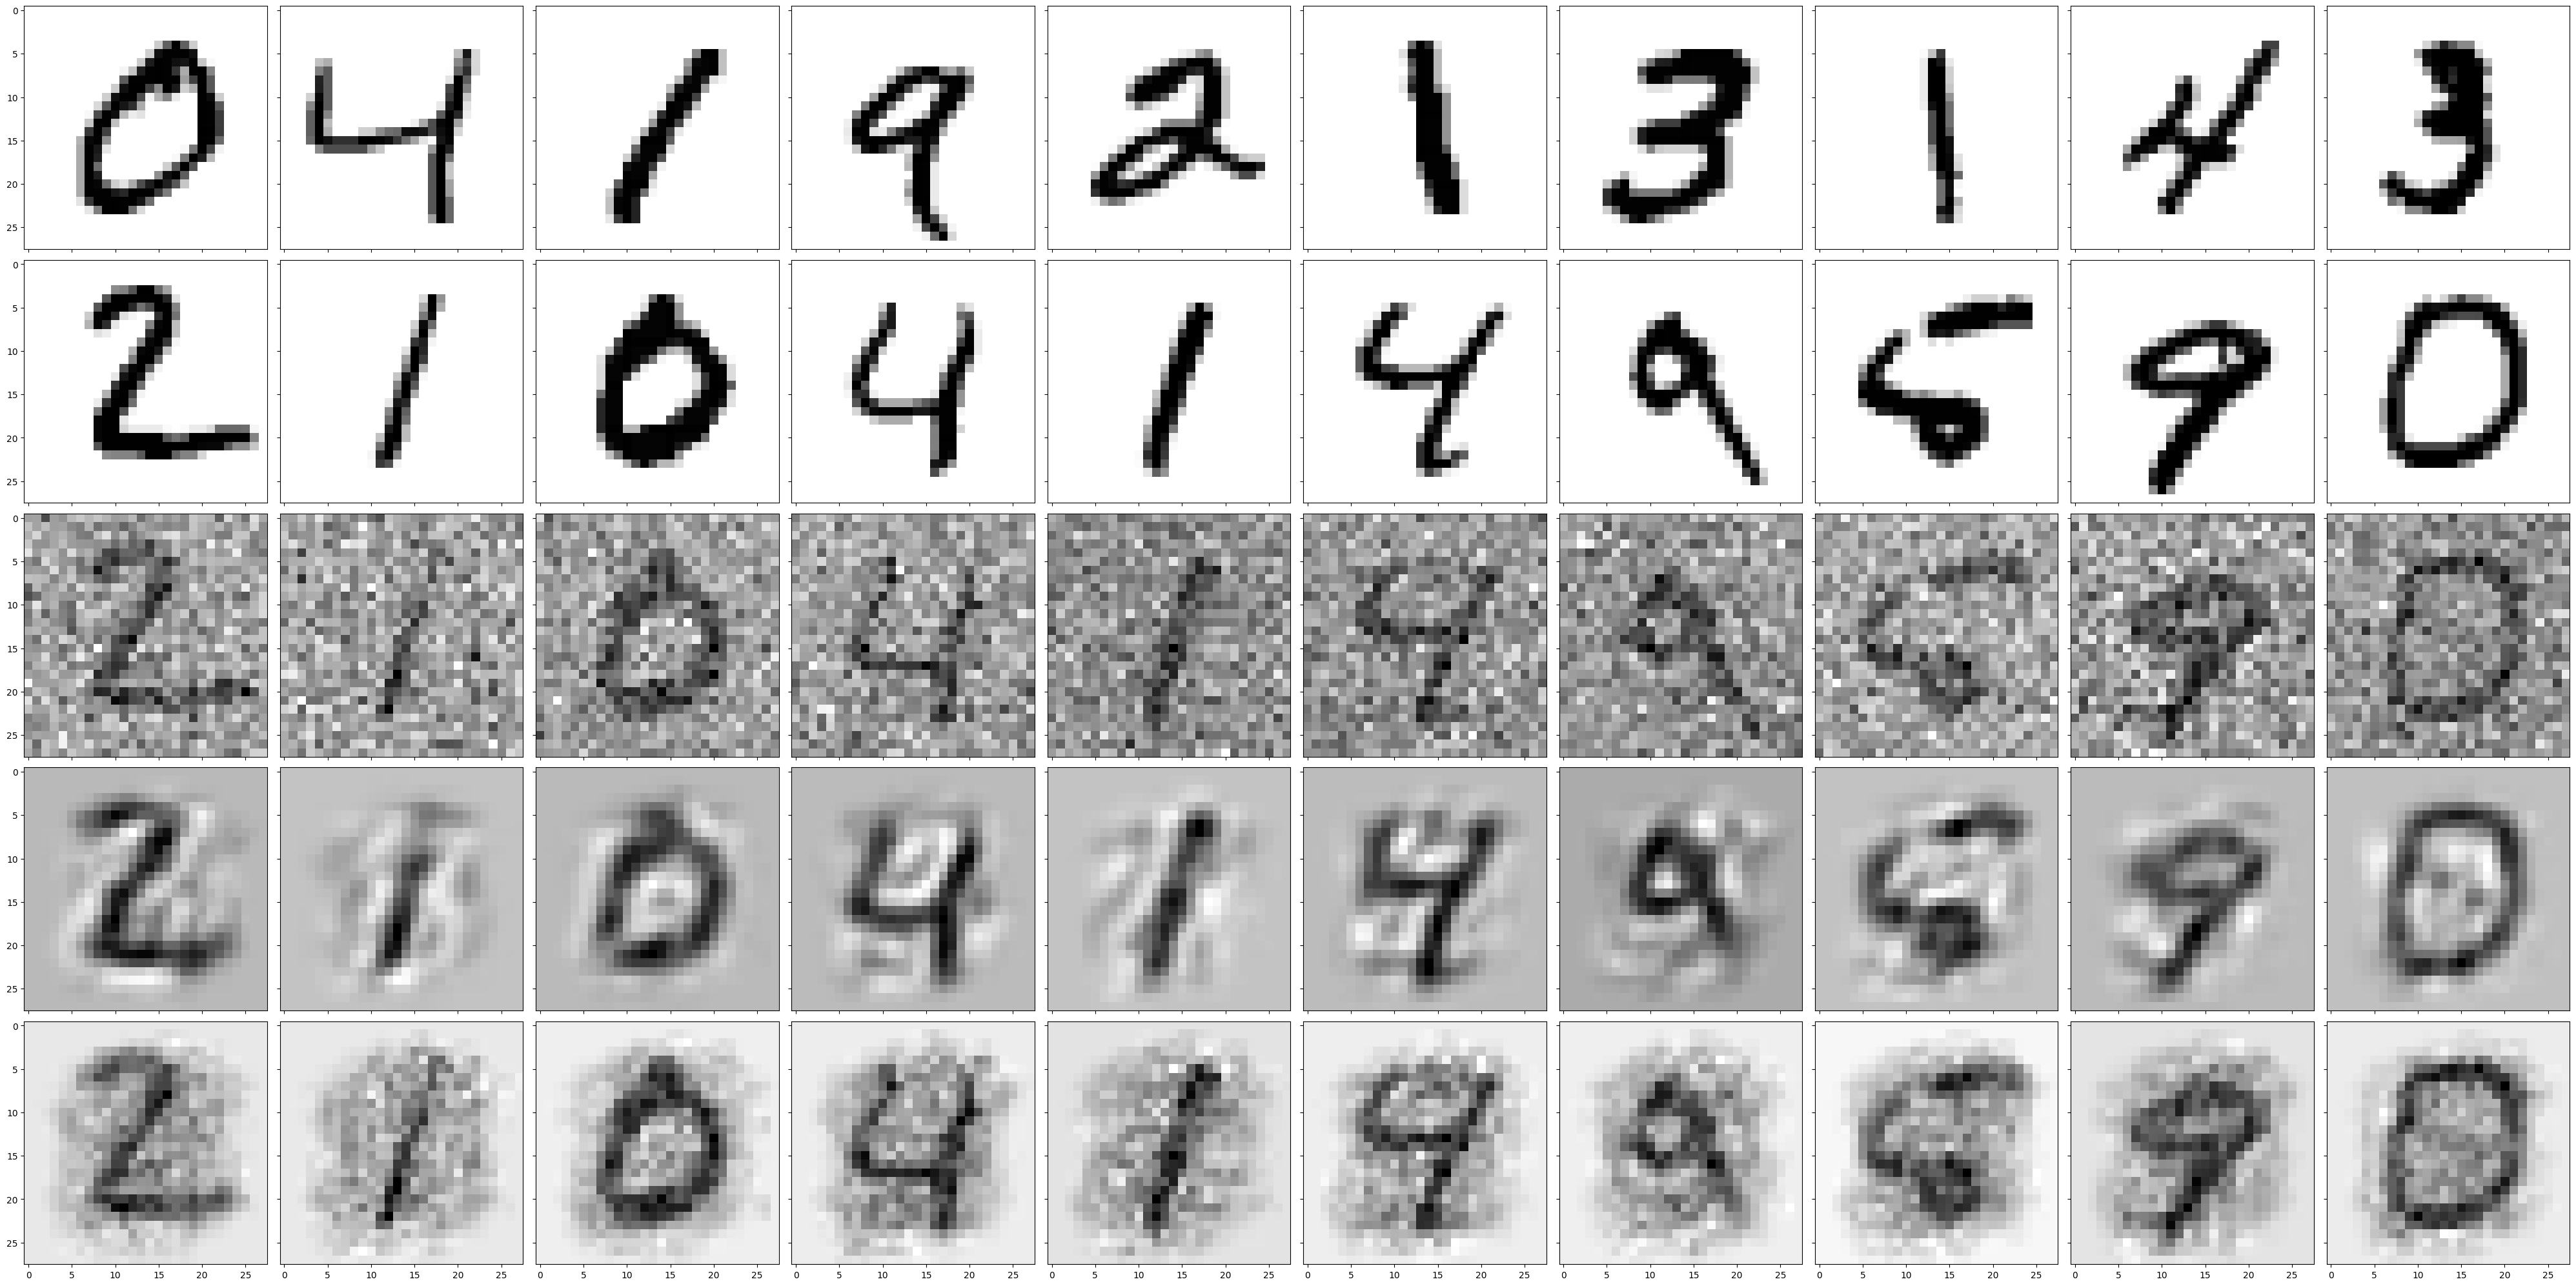

In [23]:
# Reconstruction of test noisy images

sigma_noise = 100

X_test_noisy = X_test + sigma_noise*np.random.randn(*np.shape(X_test))

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_noisy_pca = pca.transform(X_test_noisy)
X_test_noisy_back_pca = pca.inverse_transform(X_test_noisy_pca)


n_components = 1000

kernel = 'rbf'
gamma = 1.2e-7
alpha = 1.0e-12

kpca = KernelPCA(n_components=n_components,
                 kernel=kernel, 
                 fit_inverse_transform=True, 
                 gamma=gamma,
                 alpha=alpha)

X_train_kpca = kpca.fit_transform(X_train)
X_test_noisy_kpca = kpca.transform(X_test_noisy)
X_test_noisy_back_kpca = kpca.inverse_transform(X_test_noisy_kpca)


Xs = (X_train, X_test, X_test_noisy, X_test_noisy_back_pca, X_test_noisy_back_kpca)

_, _ = plot_panel_images(Xs, image_shape=image_shape, 
                         n_columns_plot=10, 
                         scale_plot=4, n_fig=1, 
                         figsize=(16, 16))
